<a href="https://colab.research.google.com/github/priya-200/Loan-Eligibility-Prediction/blob/main/Loan%20Eligibility%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Eligibility Analysis**

Dataset from : https://www.kaggle.com/datasets/ujjwalprakash/loan-eligibility

This notebook analyzes a dataset containing information about loans and customer profiles to determine loan eligibility and understand factors influencing loan status.

## **Dataset Overview**

The dataset contains the following features:

### **1. Loan Information**
- **Loan ID**: Unique identifier for a customer's loan.
- **Customer ID**: Unique identifier for a customer.
- **Loan Status**:
  - `chargedOff`: The loan is in default, and no further payment is expected.
  - `fullPaid`: The loan has been fully repaid.
- **Current Loan Amount**: The principal balance of the loan.
- **Term**: Indicates whether the loan is long-term or short-term.

### **2. Customer Financial Profile**
- **Credit Score**: The customer's creditworthiness score.
- **Annual Income**: Annual income of the customer.
- **Monthly Debt**: The customer's monthly debt payments.
- **Current Credit Balance**: The current balance on the customer's credit card.
- **Maximum Open Credit**: Maximum credit limit available on the customer's credit card.

### **3. Customer Employment and Residence**
- **Years in Current Job**: Number of years the customer has been in their current job.
- **Home Ownership**: The type of home ownership the customer has (e.g., own, mortgage, rent).

### **4. Credit History and Issues**
- **Years of Credit History**: The length of the customer's credit history in years.
- **Months Since Last Delinquent**: Number of months since the customer last defaulted on an EMI.
- **Number of Open Accounts**: Total number of open accounts (e.g., savings, current).
- **Number of Credit Problems**: The number of credit-related issues the customer has faced, such as late payment penalties.
- **Bankruptcies**: The number of times the customer has filed for bankruptcy.
- **Tax Liens**: The number of tax liens imposed on the customer.

### **5. Loan Purpose**
- **Purpose**: The reason for taking out the loan (e.g., debt consolidation, home improvement).

---

## **Steps in Analysis**
1. **Data Preprocessing**:
   - Handle missing values.
   - Encode categorical variables.
   - Normalize numerical features.
   
2. **Exploratory Data Analysis (EDA)**:
   - Analyze distributions of features.
   - Identify correlations between features and loan status.

3. **Feature Engineering**:
   - Create new features, such as debt-to-income ratio or credit utilization.

4. **Modeling**:
   - Split the data into training and testing sets.
   - Train classification models to predict loan status (`chargedOff` or `fullPaid`).

5. **Evaluation**:
   - Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

---

## **Expected Outcomes**
- Identify key factors influencing loan eligibility.
- Develop a model that predicts the likelihood of a loan being charged off or fully paid.

---

### **Getting Started**
Ensure the following libraries are installed in your Colab environment:
- **Pandas**: For data manipulation.
- **NumPy**: For numerical operations.
- **Matplotlib/Seaborn**: For data visualization.
- **scikit-learn**: For machine learning models and preprocessing.

Run the following command to install missing libraries:
```python
!pip install pandas numpy matplotlib seaborn scikit-learn


## IMPORT DATA

In [ ]:
#!/bin/bash

!kaggle datasets download ujjwalprakash/loan-eligibility

Dataset URL: https://www.kaggle.com/datasets/ujjwalprakash/loan-eligibility
License(s): unknown
100% 14.3M/14.3M [00:00<00:00, 43.5MB/s]
100% 14.3M/14.3M [00:00<00:00, 40.8MB/s]


In [ ]:
!unzip /content/loan-eligibility.zip -d /content/loan-eligibility

Archive:  /content/loan-eligibility.zip
  inflating: /content/loan-eligibility/loan eligibility.xlsx  


##IMPORT STATEMENTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mngo

import seaborn as sns
palette_color = sns.color_palette("rocket_r", as_cmap=True)

from scipy.stats import chi2_contingency
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## IMPORTANT FUNCTIONS.

In [ ]:
def remove_outliers(column, df):
    column_name = column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame and return the updated one
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [ ]:
def calculate_outlier_percentage(column, df):
    column_name = column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(df)) * 100

    return outlier_percentage

In [ ]:
def missing_percentage_column(df, column_name):
    missing_percentage = (df[column_name].isna().sum() / len(df)) * 100
    return missing_percentage

In [ ]:
def compare_numerical_with_target(column,target = 'Target'):
  correlation = df[column].corr(df[target])
  print(f"Correlation: {correlation}")

In [ ]:
def compare_categorical_with_target(df, categorical_column, target_column='Target'):
    # Convert the categorical column to a string type if it appears to be numeric
    if pd.api.types.is_numeric_dtype(df[categorical_column]):
        print(f"Column '{categorical_column}' is numeric but treated as categorical.")
        df[categorical_column] = df[categorical_column].astype(str)

    # Frequency distribution of the categorical column and target
    cat_freq = df[categorical_column].value_counts()
    target_freq = df[target_column].value_counts()

    print(f"\nFrequency distribution of {categorical_column}:\n{cat_freq}\n")
    print(f"Frequency distribution of {target_column}:\n{target_freq}\n")

    # Cross-tabulation to check the relationship between the categorical column and the target
    cross_tab = pd.crosstab(df[categorical_column], df[target_column])
    print(f"\nCross-tabulation between {categorical_column} and {target_column}:\n{cross_tab}\n")

    # Chi-squared test for independence
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    print(f"Chi-squared test statistic: {chi2}")
    print(f"P-value: {p}")

    if p < 0.05:
        print(f"The categorical variable '{categorical_column}' has a statistically significant relationship with '{target_column}'.")
    else:
        print(f"The categorical variable '{categorical_column}' does not have a statistically significant relationship with '{target_column}'.")


## LOAD THE DATASET.

In [ ]:
df = pd.read_excel("/content/loan-eligibility/loan eligibility.xlsx")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [ ]:
df_copy = df.copy()

## EXPLORATORY DATA ANALYSIS.

In [ ]:
df.shape # So we have 1 lakh recods with 19 rows to deal with.

(100000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

**INSIGHTS:**
1. Credit score,Annual income,Years in current job,Months since last delinquent,Maximum Open Credit,Bankruptcies,Tax Liens has null values
2. Years in current job should be a numerical column but now it is in object datatype

<Axes: >

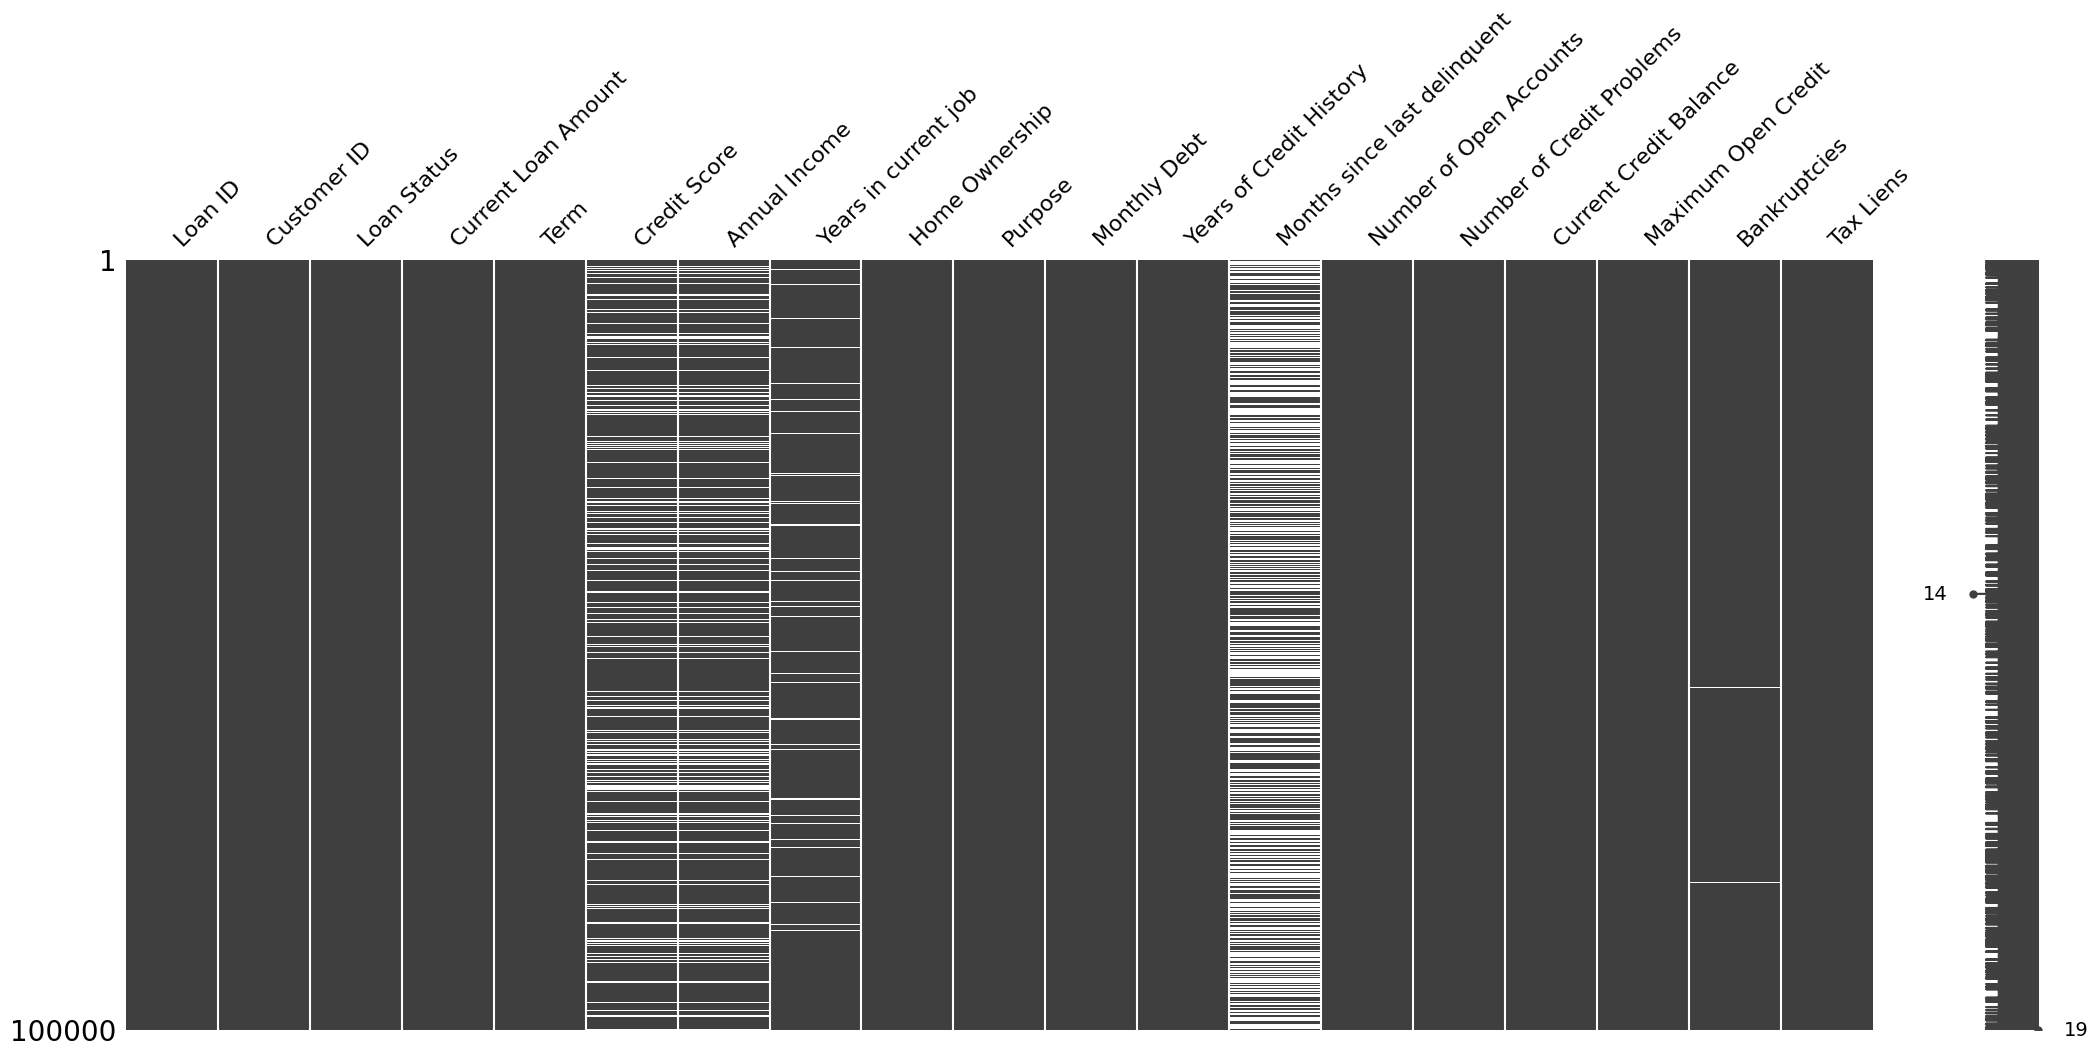

In [ ]:
mngo.matrix(df)

In [ ]:
len(df[df['Annual Income'].isna()]),len(df[df['Credit Score'].isna()])

# By this we can say that the missingness is not random An to be told both the
# feature are high importance in prediction so it is better to drop the nan in both columns.

(19154, 19154)

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.duplicated().sum() # Duplicated values will affect our models prediction so we can remove these duplicates.

10215

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(89785, 19)

#### Dataset missing percentages

In [ ]:
# Let's see the percentage of null values in each columns

null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

null_percentage_df

,Column,Null Percentage
0,Loan ID,0.000000
1,Customer ID,0.000000
2,Loan Status,0.000000
3,Current Loan Amount,0.000000
4,Term,0.000000
5,Credit Score,21.333185
6,Annual Income,21.333185
7,Years in current job,4.234560
8,Home Ownership,0.000000
9,Purpose,0.000000


In [ ]:
# Let's see the unique values in each columns and percentage of the unique values
#of each columns by which we can divide the columns into categorical and numerical columns

unique_counts = df.nunique()
unique_percentage = (unique_counts / len(df)) * 100
unique_values_df = pd.DataFrame({
    'Unique Count': unique_counts,
    'Unique Percentage': unique_percentage
})
unique_values_df['Column Type'] = unique_values_df['Unique Count'].apply(
    lambda x: 'Categorical' if x < 10 else 'Numerical'
)
unique_values_df

,Unique Count,Unique Percentage,Column Type
Loan ID,81999,91.328173,Numerical
Customer ID,81999,91.328173,Numerical
Loan Status,2,0.002228,Categorical
Current Loan Amount,22004,24.507434,Numerical
Term,2,0.002228,Categorical
Credit Score,324,0.360862,Numerical
Annual Income,36174,40.289581,Numerical
Years in current job,11,0.012251,Numerical
Home Ownership,4,0.004455,Categorical
Purpose,16,0.017820,Numerical


## DATA CLEANING

### Months since last delinquent

In [ ]:
# As the column Months since last delinquent has 53% of missing values we can drop it

df.drop(['Months since last delinquent'],axis = 1,inplace = True)

#### INSIGHT:

- Removed the column because of the high percentage of missing values.

### Loan Status/Target

In [ ]:
df['Loan Status'].unique() # Only two categorical values are there and this is the target column

array(['Fully Paid', 'Charged Off'], dtype=object)

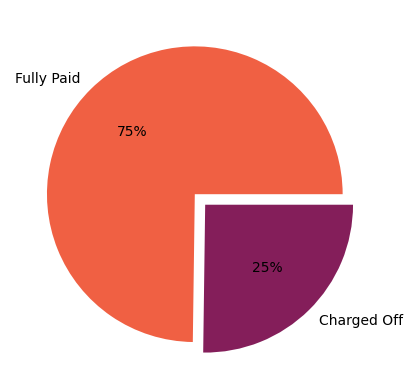

In [ ]:
# Let's see the composition of the combinations.

values_counts = df['Loan Status'].value_counts()
explode = [0, 0.1]
colors = sns.color_palette("rocket_r", n_colors=len(values_counts))
plt.pie(values_counts, labels=values_counts.index, autopct='%.0f%%', explode=explode, colors=colors)
plt.show()

In [ ]:
df['Loan Status'].isna().sum()

0

In [ ]:
df.rename(columns={'Loan Status': 'Target'}, inplace=True)

##### Transformation

In [ ]:
label_encoder_target = LabelEncoder()
df['Target'] = label_encoder_target.fit_transform(df['Target'])

#### INSIGHT:
- This is the target column, So we used lable encoding for this.
- We used lable encoding for transformation.

### Loan ID.

In [ ]:
df['Loan ID'].nunique() # nearly all the records have different id. This is not helpful for our model's prediction. So we can remove it

KeyError: 'Loan ID'

In [ ]:
df.drop(['Loan ID'],axis = 1,inplace = True)

KeyError: "['Loan ID'] not found in axis"

#### INSIGHT:
- We removed this because all the rows has a unique values.

### Customer ID

In [ ]:
df['Customer ID'].nunique() # nearly all the records have different id. This is not helpful for our model's prediction. So we can remove it

KeyError: 'Customer ID'

In [ ]:
df.drop(['Customer ID'],axis = 1,inplace = True)

KeyError: "['Customer ID'] not found in axis"

#### INSIGHT:
- we removed this column as the rows has unique values.

###Current Loan Amount

In [ ]:
df['Current Loan Amount'].dtype # Okay it is integer datatype and we can just use transformation at last .

dtype('int64')

In [ ]:
df['Current Loan Amount'].isna().sum() # Okay no null values which is good for our model.

0

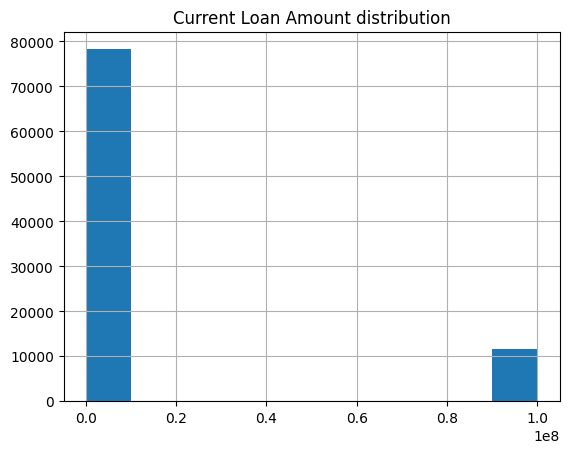

In [ ]:
df['Current Loan Amount'].hist()
plt.title("Current Loan Amount distribution")
plt.show()

In [ ]:
# Let's visualize the univariant analysis of this columns

df['Current Loan Amount'].nunique() # Despite of having 22004 unique vlaues the histogram graph shows us the data we are deailing with is a binary coloumn

# This indicate we need to counduct a investication about this  column

22004

In [ ]:
df.sort_values(by = "Current Loan Amount",ascending = False)['Current Loan Amount'].unique()[:20]

# By this we can see that there is a extream outlier called 99999999 which is actually affecting our visualization. This is evident by the box plot.

array([99999999,   789250,   789184,   789096,   789030,   788942,
         788876,   788788,   788722,   788634,   788568,   788480,
         788414,   788326,   788260,   788172,   788106,   788018,
         787952,   787864])

<Axes: ylabel='Current Loan Amount'>

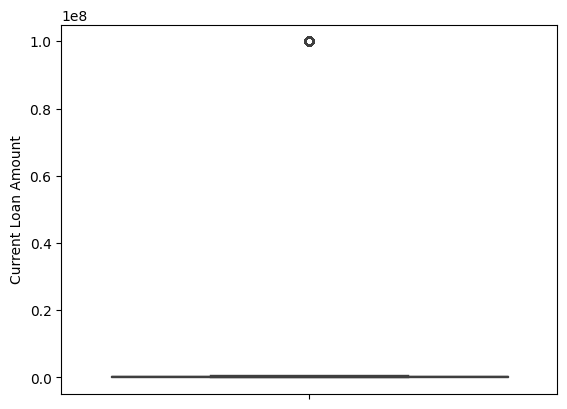

In [ ]:
sns.boxplot(df['Current Loan Amount']) # Our initution about the data is correct as there is a extream outlier in our dataset.

In [ ]:
# Let's see how many records have that type of problem.

df[df['Current Loan Amount'] == 99999999]

# Nearly 11484 records has this type of outlier which is nearly ~12.79% of data which we don't want to waste.
# So will fill it with null value and then we will impute the values of this outliers which is a effective way for handelling this.

,Target,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,1,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
10,1,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,16,0,203965,289784.0,0.0,0.0
12,1,99999999,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,6,0,134083,220220.0,0.0,0.0
13,1,99999999,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,10,1,225549,496474.0,1.0,0.0
26,1,99999999,Short Term,724.0,1029857.0,1 year,Rent,Debt Consolidation,13817.18,12.0,6,0,138339,221232.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,1,99999999,Short Term,674.0,1058376.0,< 1 year,Home Mortgage,Other,11554.09,10.1,12,0,14098,333300.0,0.0,0.0
99971,1,99999999,Long Term,616.0,1530564.0,8 years,Rent,Medical Bills,13264.85,28.0,10,0,111283,162910.0,0.0,0.0
99990,1,99999999,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,9,0,37392,134442.0,0.0,0.0
99996,1,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22,0,153045,509234.0,0.0,0.0


In [ ]:
print(f"Percentage of ouliers are : {calculate_outlier_percentage('Current Loan Amount',df)}")

Percentage of ouliers are : 12.790555215236399


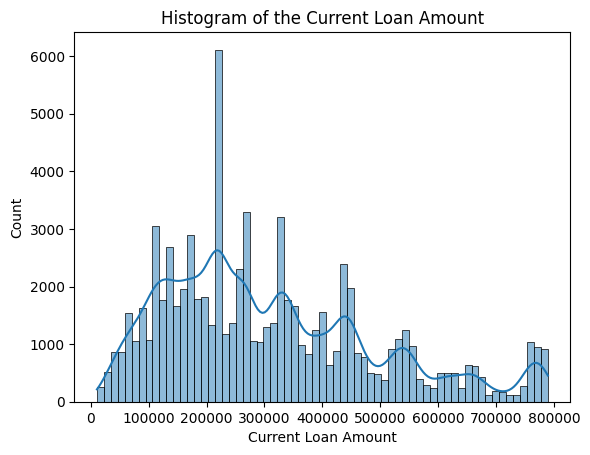

In [ ]:
# Replace the outlier with NaN and visualization.

df['Current Loan Amount'] = df['Current Loan Amount'].replace(99999999, np.nan)
sns.histplot(df['Current Loan Amount'],kde = True)
plt.title("Histogram of the Current Loan Amount")
plt.show() # I think there is a right skewnwss in the column tso let's see the skewness

In [ ]:
# Checking the skewness of the data

skewness = df['Current Loan Amount'].skew()
print(f"Skewness: {skewness}") # By intitution our data is moderately skewed distribution

Skewness: 0.7762313462329745


 **Skewness Interpretation**

- **0**: Perfectly symmetric distribution.
- **> 0**: Right (positive) skewed.
- **< 0**: Left (negative) skewed.
- **> 0.5 or < -0.5**: Moderately skewed; consider transformation.
- **> 1 or < -1**: Highly skewed; transformation is often necessary.

In [ ]:
# As the column is a skewed one we can just fill the missing value with the median of the column

df['Current Loan Amount'].fillna(df['Current Loan Amount'].median(),inplace = True) # This is also having a high left skewness

In [ ]:
calculate_outlier_percentage('Current Loan Amount',df)

3.7600935568302054

In [ ]:
df['Current Loan Amount'].skew()

0.9174483475957782

#### INSIGHT:
- It had a lot of outliers so i replaced it with nan and then filled the missing values with median.
- The skewness after replacing is 0.91 which indicate there is a high right skewness
- The percentage of outlier is 3.7%
- yeo-johnson transformation reduces the skewness by significant amount so we can use this transformation at last (Yet to transform)

#### Transformation

<Axes: ylabel='Current Loan Amount'>

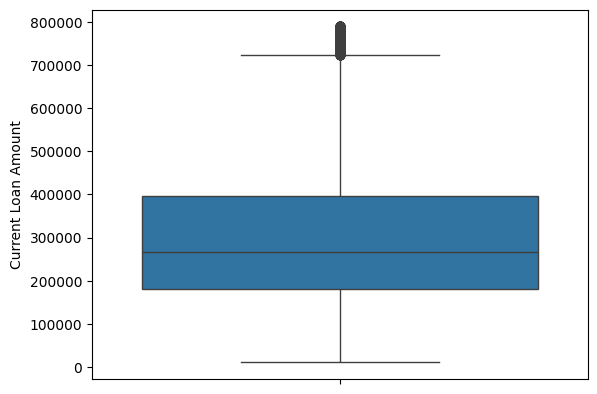

In [ ]:
sns.boxplot(df['Current Loan Amount'])

In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
df['Test_Current_Loan_Amount'] = transformer.fit_transform(df[['Current Loan Amount']])
skewness_after_imputation = df['Test_Current_Loan_Amount'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")
# We can see that the yeo-johnson transformation has significantly reduced our skewness

Skewness after imputation: -0.01


Skewness: -0.011854033982710782
Percentage of outlier after transformation : 0.41877819234838787


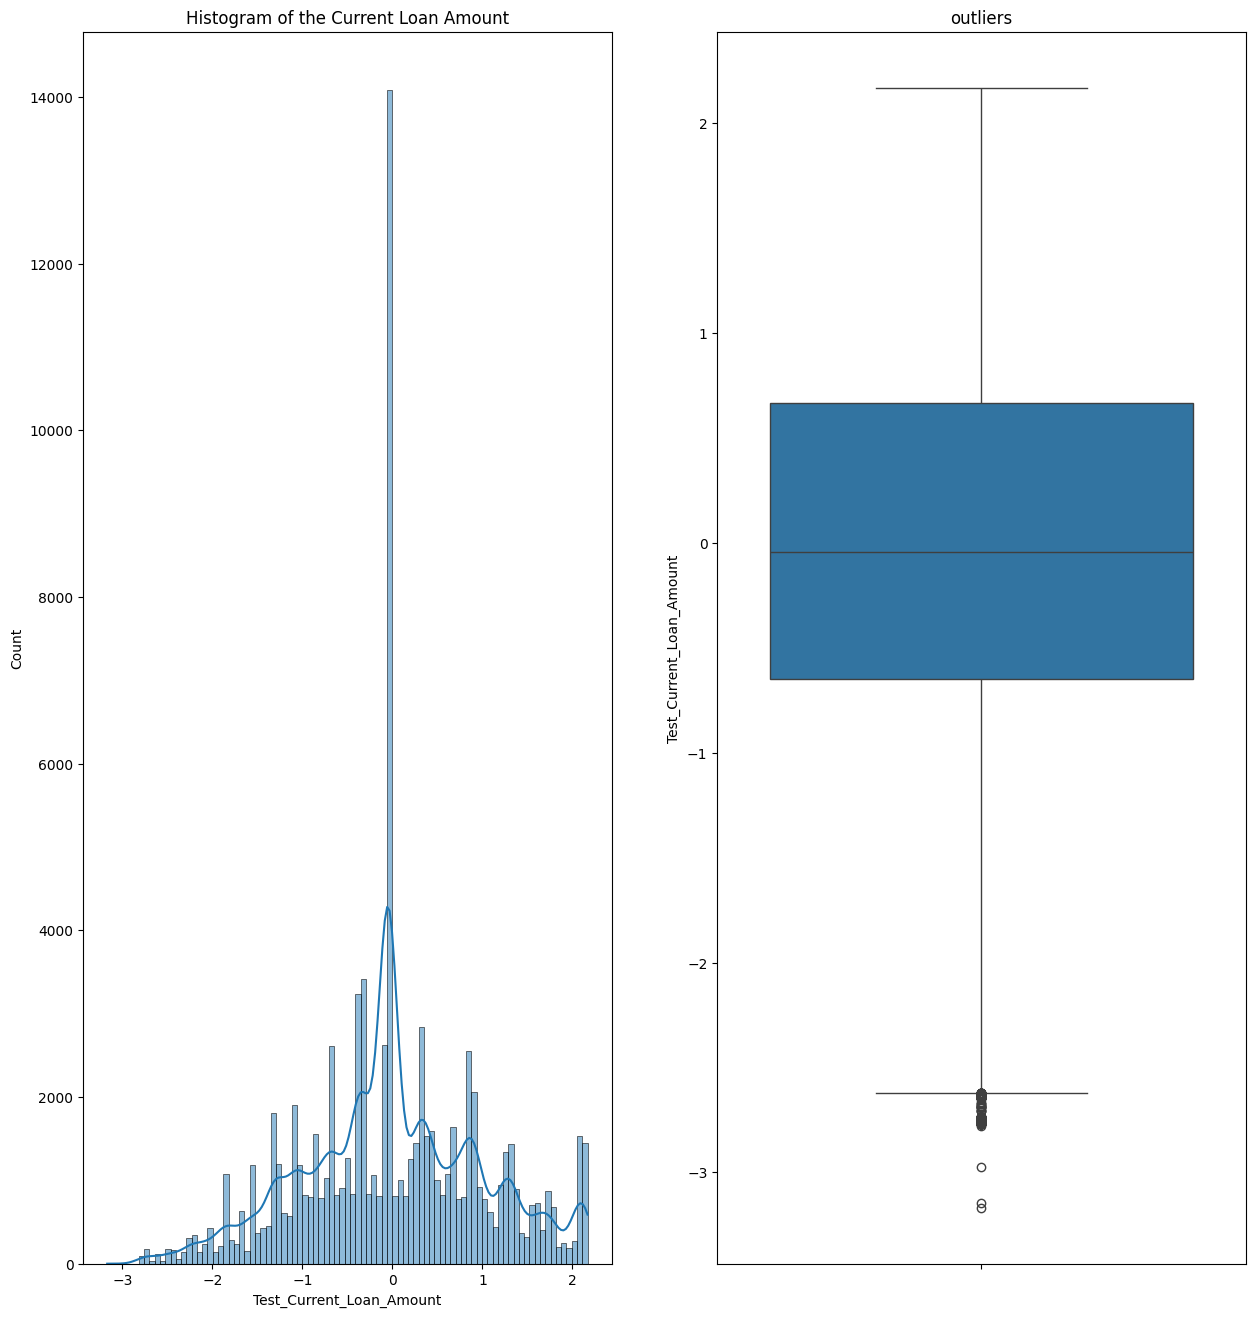

In [ ]:
# Now check the distribution and the skewness

skewness = df['Test_Current_Loan_Amount'].skew()
print(f"Skewness: {skewness}")
print(f"Percentage of outlier after transformation : {calculate_outlier_percentage('Test_Current_Loan_Amount',df)}")
plt.figure(figsize = (15,16))

plt.subplot(1,2,1)
sns.histplot(df['Test_Current_Loan_Amount'],kde = True)
plt.title("Histogram of the Current Loan Amount")

plt.subplot(1,2,2)
sns.boxplot(df['Test_Current_Loan_Amount'])
plt.title("outliers")
plt.show()

In [ ]:
# This looks great as there is very little outlier so we can implement in our original dataset

df['Current Loan Amount'] = df['Test_Current_Loan_Amount']
df.drop('Test_Current_Loan_Amount',axis = 1,inplace = True)

In [ ]:
df['Current Loan Amount'].skew()

-0.011854033982710782

In [ ]:
calculate_outlier_percentage('Current Loan Amount',df)

0.41877819234838787

In [ ]:
df = remove_outliers('Current Loan Amount',df)

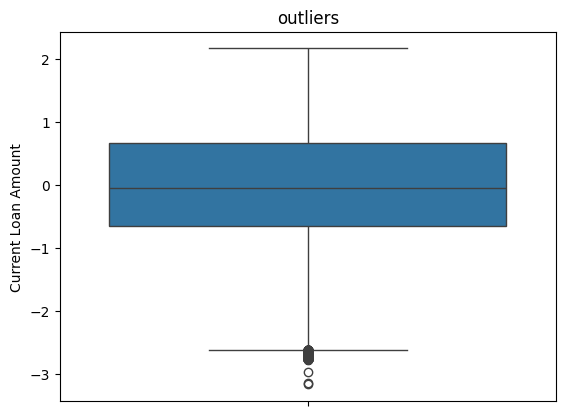

In [ ]:
# After removing the outlier

sns.boxplot(df['Current Loan Amount'])
plt.title("outliers")
plt.show()

In [ ]:
df['Current Loan Amount'].isna().sum()

0

### Term

In [ ]:
df['Term'].dtype # The Column is a Object datatype

dtype('O')

In [ ]:
df['Term'].unique() # There are only 2 categorical column

array(['Short Term', 'Long Term'], dtype=object)

In [ ]:
df['Term'].isna().sum()

0

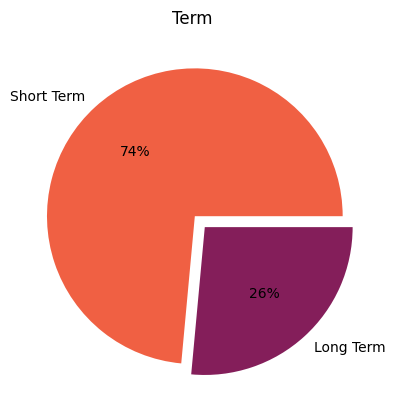

In [ ]:
# Visualising the Term column

values_counts = df['Term'].value_counts()
explode = [0, 0.1]
colors = sns.color_palette("rocket_r", n_colors=len(values_counts))
plt.pie(values_counts, labels=values_counts.index, autopct='%.0f%%', explode=explode, colors=colors)
plt.title("Term ")
plt.show()

Encoding Categorical Data - "Term" Column

Given the context that the `"Term"` column has two categories with imbalanced distribution (74% 'Short Term' and 26% 'Long Term'):

* **Label Encoding** would be a reasonable choice since:
  * You have **only two categories**, so the relationship is simple and won't be misinterpreted by the model.
  * It doesn’t increase the dimensionality of the dataset (which is beneficial for performance).
  * For most models like **Decision Trees**, **Random Forests**, or **XGBoost**, Label Encoding will work fine without any issues.

* **One-Hot Encoding** could also be used, especially if you're working with **linear models** (like **Logistic Regression**) or models that assume a non-linear relationship. However, in this case, since there are only two categories, Label Encoding may be simpler and more efficient.

Key Takeaway:
- **Label Encoding** is a good choice when the categorical variable is binary or has an ordinal relationship and you are using tree-based models or want to avoid increasing the dimensionality unnecessarily.
- **One-Hot Encoding** is better suited for models that need explicit separation between categories (e.g., linear models), but for binary features, it may not provide a significant advantage over Label Encoding.

So, in your case, **Label Encoding** is likely the most efficient approach, especially if you're using tree-based models.


#### Transformation

In [ ]:
lable_encoding_term = LabelEncoder()
df['Term'] = lable_encoding_term.fit_transform(df['Term'])

#### INSIGHT:
- This is a categorical column with two values.
- We used lable encoding(Done Encoding)

### Credit Score

In [ ]:
df['Credit Score'].dtype # It is a float data type

dtype('float64')

In [ ]:
df['Credit Score'].isna().sum()

19154

In [ ]:
# Percentage of the missing values.

print(f"The percentage of the missing values in the Credit Score column is {((df['Credit Score'].isna().sum() / df.shape[0]) * 100):.2f}%")

The percentage of the missing values in the Credit Score column is 21.33%


In [ ]:
# As This is a important feature we can remove the nan values to avoid noise in our dataset

dfc = df[df['Credit Score'].isnull()]
df.drop(dfc.index,inplace=True)

In [ ]:
df.shape

(70631, 16)

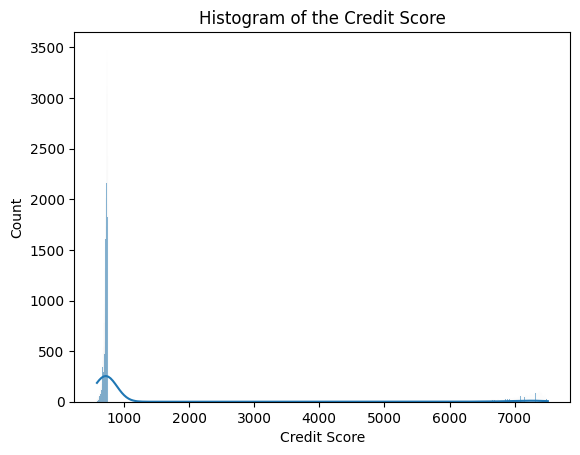

In [ ]:
# Visualizing the Credit Score column

sns.histplot(df['Credit Score'],kde = True)
plt.title("Histogram of the Credit Score")
plt.show() # The problem is similar to the before one

In [ ]:
df['Credit Score'].nunique()

324

In [ ]:
df.sort_values(by = 'Credit Score',ascending = False)['Credit Score'].unique()[:20]

# There are no as such outliers from the previous case but still there is a high skewness in the dataset

array([7510., 7500., 7490., 7480., 7470., 7460., 7450., 7440., 7430.,
       7420., 7410., 7400., 7390., 7380., 7370., 7360., 7350., 7340.,
       7330., 7320.])

In [ ]:
print(f"The Skewness of the credit score column is {df['Credit Score'].skew()}")

# From this skewness we can confirm that there is a high skewness in our column so we need to use some transformations.

The Skewness of the credit score column is 3.5607244398292726


In [ ]:
## To see if we should drop the column or retain the column it depends on the correlation or importances of the column on predicting the target column.

correlation = df['Credit Score'].corr(df['Target'])
print(f"Correlation: {correlation}") # As the column has a moderate corrlation with the target variable it is not suggestes to drop this column

Correlation: -0.45936279919243694


<Axes: ylabel='Credit Score'>

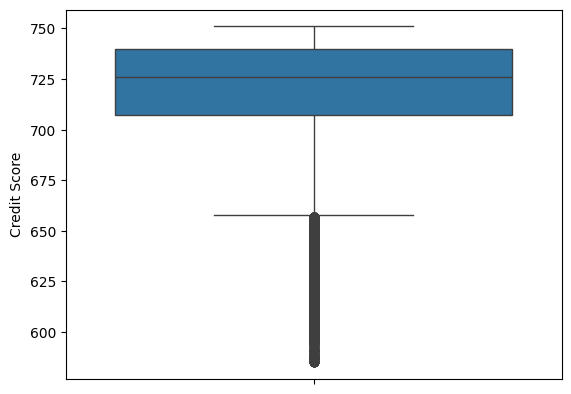

In [ ]:
## See for the outliers first.

sns.boxplot(df['Credit Score'])

In [ ]:
# Calculate the outliers percentage.

outlier_percentage = calculate_outlier_percentage('Credit Score', df)
print(f"The percentage of outliers is {outlier_percentage:.2f}%")

The percentage of outliers is 10.25%


In [ ]:
# Handling the Potential Outliers
# Credit_score
# Since credit_score is a 3-digit number that represents the creditworthiness of an individual.
# It typically ranges between 300 and 900 and always have integer format, hence removing the outliers
# Deleting records where credit_score is greater than 900

dfc = df[df['Credit Score']>900]
df.drop(dfc.index,inplace=True)
df.shape

(63334, 15)

<Axes: ylabel='Credit Score'>

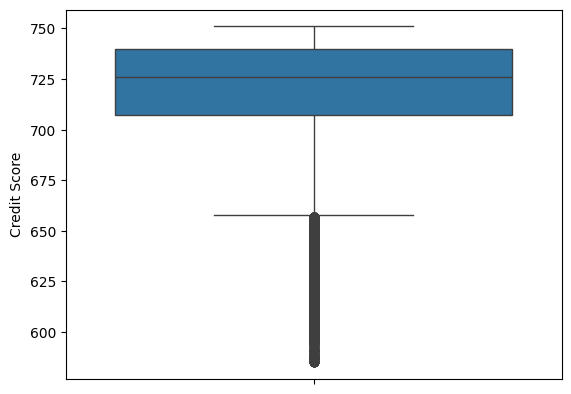

In [ ]:
sns.boxplot(df['Credit Score'])

#### INSIGHT:
- This is a important column so we droped the missing valaus for reducing the noise.
- But there is a large amount of outliers in this columns
- This is right skewed
- (Encoding yet ot be done)

In [ ]:
np.sqrt(df['Credit Score']).skew()

-1.5824446713875118

#### Transformation

In [ ]:
(df['Credit Score'].fillna(np.nanmedian(df['Credit Score']))).skew()

3.5607244398292726

In [ ]:
np.sqrt(np.log1p(df['Credit Score'].fillna(np.nanmedian(df['Credit Score'])))).skew()

# For every transformation the same skewness

3.515939847812828

In [ ]:
df['Test'] = df['Credit Score'].fillna(np.nanmedian(df['Credit Score']))
print(df['Test'].isna().sum())

0


In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = transformer.fit_transform(df[['Test']])
skewness_after_imputation = df['YeoJohnson_Transformed'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")

Skewness after imputation: 0.00


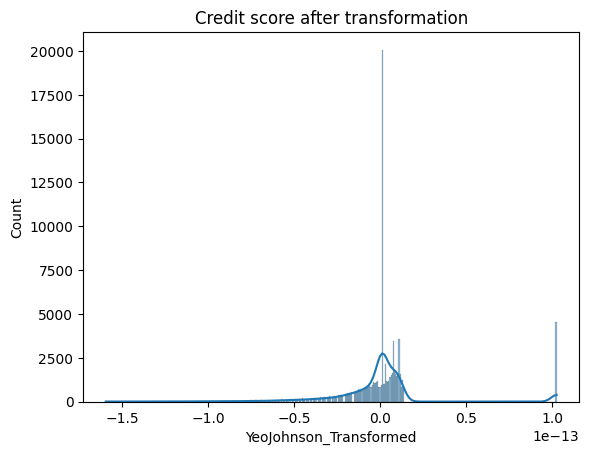

In [ ]:
sns.histplot(df['YeoJohnson_Transformed'],kde = True)
plt.title('Credit score after transformation')
plt.show()

13.80631508603887

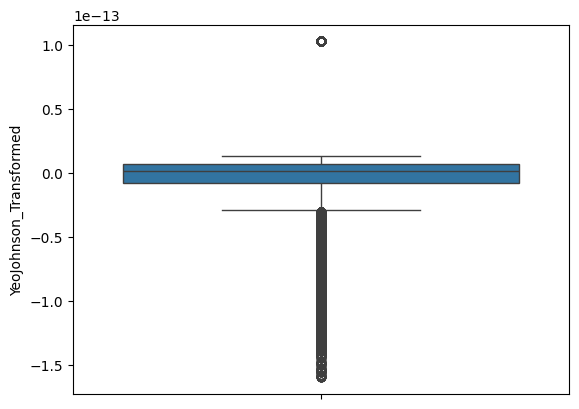

In [ ]:
sns.boxplot(df['YeoJohnson_Transformed'])
calculate_outlier_percentage('YeoJohnson_Transformed',df)

In [ ]:
# Remove the outlier for reducing the noise

df = remove_outliers('YeoJohnson_Transformed',df)
df.shape

(77389, 18)

<Axes: ylabel='YeoJohnson_Transformed'>

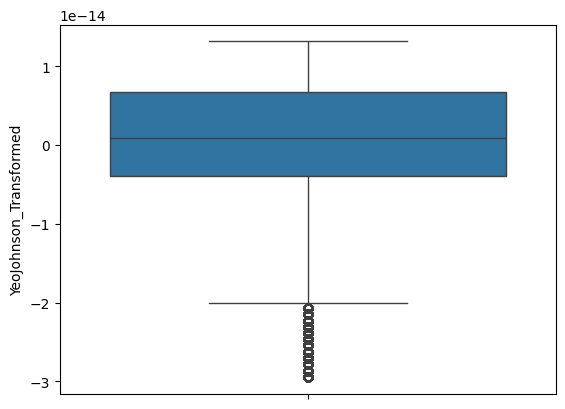

In [ ]:
sns.boxplot(df['YeoJohnson_Transformed']) # This looks greate so we can chaneg the original column

In [ ]:
df.columns

Index(['Target', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Test',
       'YeoJohnson_Transformed'],
      dtype='object')

In [ ]:
df['Credit Score'] = df['YeoJohnson_Transformed']
df.drop('YeoJohnson_Transformed',axis = 1,inplace = True)

<Axes: ylabel='Credit Score'>

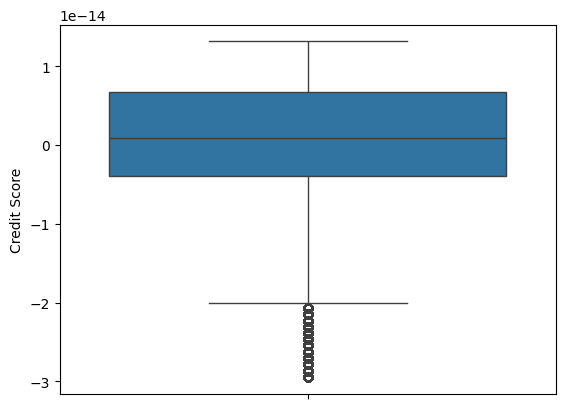

In [ ]:
sns.boxplot(df['Credit Score'])

In [ ]:
df['Credit Score'].skew(),calculate_outlier_percentage('Credit Score',df),df.shape

(0.0, 5.144141932315962, (77389, 17))

In [ ]:
df['Test'] = df['Credit Score'].fillna(np.median(df['Credit Score']))
def signed_log_transform(column):
    return np.sign(column) * np.log1p(np.abs(column))
df['Transformed_Test'] = signed_log_transform(df['Test'])

In [ ]:
df['Transformed_Test'].skew()
# This also did not reduce the skewness in the data

3.521337065614207

In [ ]:
df.drop(["Transformed_Test"],axis = 1,inplace = True)

In [ ]:
min_value = df['Test'].min()
if min_value < 0:
    df['Test_Adjusted'] = df['Test'] - min_value + 1
else:
    df['Test_Adjusted'] = df['Test']

# Apply the square root transformation
df['SquareRoot_Transformed'] = np.sqrt(df['Test_Adjusted'])

# Check the skewness after transformation
transformed_skewness = df['SquareRoot_Transformed'].skew()
print(f"Skewness after transformation: {transformed_skewness}")

# Square Root Transformation doesn't work here.

Skewness after transformation: 3.5466106733107847


In [ ]:
df.drop(['Test_Adjusted', 'SquareRoot_Transformed'],axis = 1,inplace = True)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df['Test'] = knn_imputer.fit_transform(df[['Credit Score']])

skewness_after_imputation = df['Test'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}") # KNN Imputation is also not working

Skewness after imputation: 4.01


In [ ]:
df['Test'] = np.log1p(df['Test'])

skewness_after_imputation = df['Test'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")

Skewness after imputation: 3.29


In [ ]:
df['Credit Score'] = df['YeoJohnson_Transformed']
df.drop(['Test','YeoJohnson_Transformed'],axis = 1,inplace = True)

In [ ]:
df['Credit Score'].skew()

0.0

In [ ]:
# We can test with both the dataset while training the model

df = remove_outliers('Credit Score',df)
df_outlier = df.copy()

<Axes: ylabel='Credit Score'>

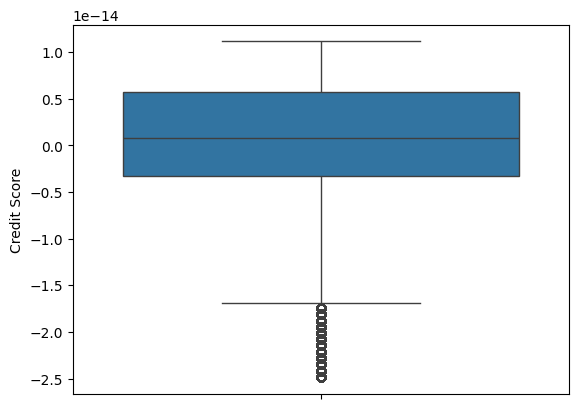

In [ ]:
sns.boxplot(df['Credit Score'])

### Annual Income

In [ ]:
df['Annual Income'].isna().sum()

0

In [ ]:
df['Annual Income'].dtype

dtype('float64')

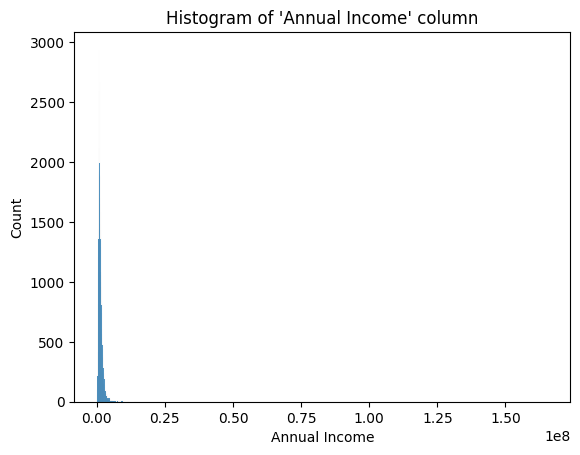

In [ ]:
sns.histplot(df['Annual Income'])
plt.title("Histogram of 'Annual Income' column")
plt.show()

In [ ]:
df['Annual Income'].skew() # This is also highly skewed

50.00487530442409

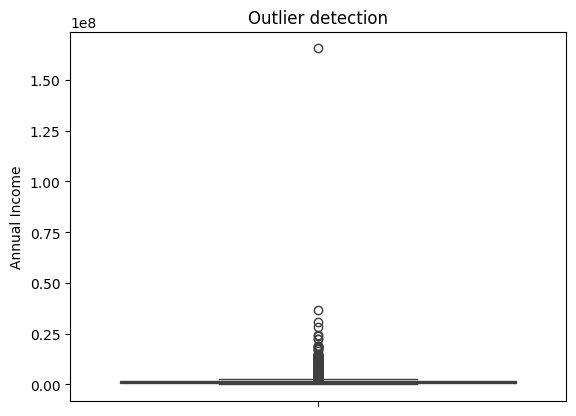

In [ ]:
sns.boxplot(df['Annual Income'])
plt.title("Outlier detection")
plt.show() # We can see that there are a lot of outliers in this columns

In [ ]:
calculate_outlier_percentage('Annual Income',df)

4.686327533236114

In [ ]:
compare_numerical_with_target('Annual Income') # As the correlation b/w the column and the target is very less we can drop this

# The other main reason for droping this column is that it has nearly 3% of its data as outlier and skewness is very high

Correlation: 0.05553652343873121


#### INSIGHT:
- We can use log transformation for this to reduce the skewness
- More outliers but don't need to remove those outliers. Maybe we will get some insight from it

#### Transformation

In [ ]:
df['Annual Income'] = np.log1p(df['Annual Income'])

0.17223318546101868

In [ ]:
df['Annual Income'].skew() # The skewness reduces significantly

0.17199756053036247

<Axes: ylabel='Annual Income'>

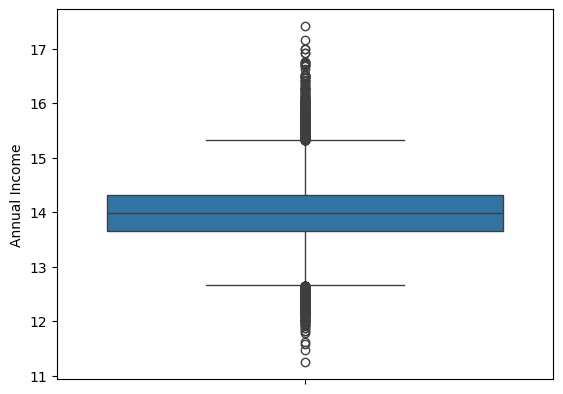

In [ ]:
sns.boxplot(df['Annual Income'])

In [ ]:
# Remove the outliers

df = remove_outliers('Annual Income',df)

<Axes: ylabel='Annual Income'>

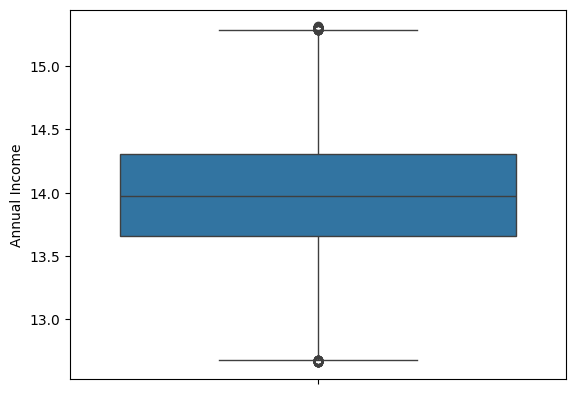

In [ ]:
sns.boxplot(df['Annual Income']) # After removing the outlier

In [ ]:
df.shape

(57044, 17)

### Years in current job

In [ ]:
df['Years in current job'].isna().sum() # It has very less missing values

2992

In [ ]:
df['Years in current job'].dtype
# Years of experience should be a numerical column but as we can see it is a object so there is a problem in here.

dtype('O')

In [ ]:
df['Years in current job'][:3] # As we can see there is years in the values which make it a problem

,Years in current job
0,8 years
2,8 years
3,3 years


In [ ]:
df['Years in current job'].nunique() # as the number of unique values is 11 it can be considered as a categorical column

11

In [ ]:
# Let's see which are the values in Years in current job

df['Years in current job'].unique()

array(['8 years', '3 years', '10+ years', '< 1 year', '2 years',
       '4 years', '1 year', '6 years', '5 years', '7 years', '9 years',
       nan], dtype=object)

In [ ]:
# So we first need to remove the 'year' string from the values

df['Years in current job'] = (df['Years in current job'].astype(str).str.replace(r'years?|year', '', regex=True).str.strip())
df['Years in current job'].unique()

array(['8', '3', '10+', '< 1', '2', '4', '1', '6', '5', '7', '9', 'nan'],
      dtype=object)

In [ ]:
# Now we need to convert the values to numeric columns.

# Replace 'nan' with np.nan
df['Years in current job'] = df['Years in current job'].replace('nan', np.nan)

# Replace '< 1' with 0
df['Years in current job'] = df['Years in current job'].replace('< 1', 0)

# Replace '10+' with 10
df['Years in current job'] = df['Years in current job'].replace('10+', 10)

# Convert the remaining values to integers
df['Years in current job'] = pd.to_numeric(df['Years in current job'], errors='coerce')

df['Years in current job'].unique()

array([ 8.,  3., 10.,  0.,  2.,  4.,  1.,  6.,  5.,  7.,  9., nan])

In [ ]:
# Now that we converted it into a numerical column first will see the number of missing values

df['Years in current job'].isna().sum()

2992

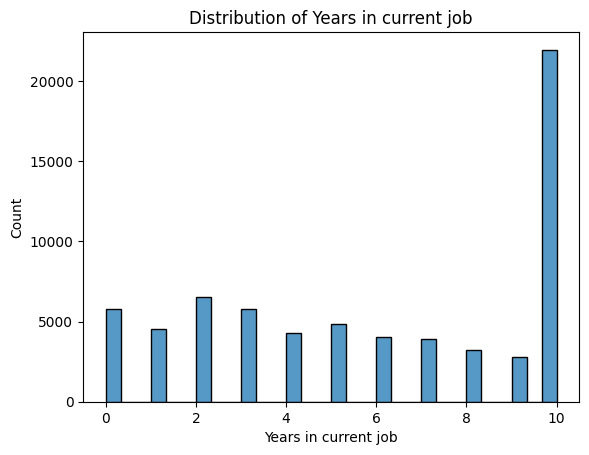

In [ ]:
# See the distribution of the data to fill the missing values.

sns.histplot(df['Years in current job'])
plt.title("Distribution of Years in current job")
plt.show()

In [ ]:
# As the missing values is very less we can just drop the missing values

dfj = df[df['Years in current job'].isnull()]
df.drop(dfj.index,inplace=True)

#### INSIGHT:
- I change this into numerical column

### Home Ownership

In [ ]:
df['Home Ownership'].dtype # It is a object column

dtype('O')

In [ ]:
df['Home Ownership'].isna().sum() # There are no missing values which is good.

0

In [ ]:
df['Home Ownership'].nunique() # Okay it is a categorical column with only 4 different values.

4

In [ ]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

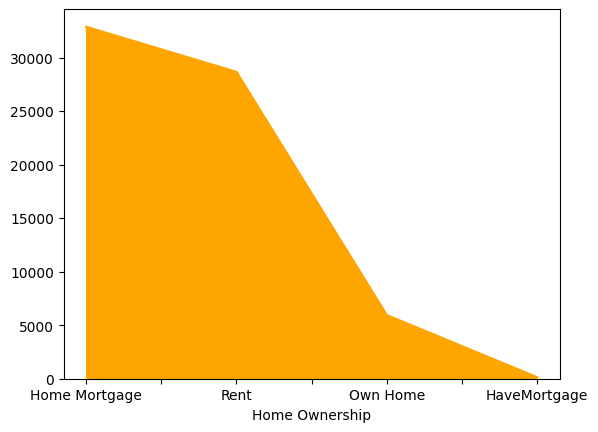

In [ ]:
df['Home Ownership'].value_counts().plot(kind='area',color='orange')
plt.show()

# Most of customers lives at residence which are home mortgaged

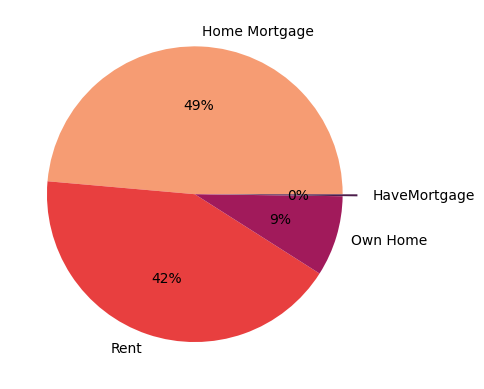

In [ ]:
# Let's visualize the composition

values_counts = df['Home Ownership'].value_counts()
explode = [0, 0, 0, 0.1]
colors = sns.color_palette("rocket_r", n_colors=len(values_counts))
plt.pie(values_counts, labels=values_counts.index, autopct='%.0f%%', explode=explode, colors=colors)
plt.show()

# By the composition we can see HaveMortgage is very less in percentage

In [ ]:
len(df[df['Home Ownership'] == 'HaveMortgage'])

148

In [ ]:
compare_categorical_with_target(df, 'Home Ownership', 'Target')
# As a Result we can say that this column is important to the prediction


Frequency distribution of Home Ownership:
Home Ownership
Home Mortgage    32876
Rent             28665
Own Home          5950
HaveMortgage       148
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    51386
0    16253
Name: count, dtype: int64


Cross-tabulation between Home Ownership and Target:
Target             0      1
Home Ownership             
HaveMortgage      22    126
Home Mortgage   7139  25737
Own Home        1459   4491
Rent            7633  21032

Chi-squared test statistic: 210.12661217107257
P-value: 2.7341275724948376e-45
The categorical variable 'Home Ownership' has a statistically significant relationship with 'Target'.


#### INSIGHT:
- According to the chi_square test this column has a significant impact on the target
- We can use label encoding for this

#### Transformation

In [ ]:
label_encoder = LabelEncoder()
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership'])

### Purpose

In [ ]:
df['Purpose'].dtype # It is a object data type

dtype('O')

In [ ]:
df['Purpose'].isna().sum() # No missing value which is good

0

In [ ]:
df['Purpose'].nunique() # That's a quit lot number of categorical values

16

In [ ]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House',
       'Business Loan', 'other', 'major_purchase', 'Take a Trip', 'Other',
       'Buy a Car', 'small_business', 'Medical Bills', 'wedding',
       'vacation', 'Educational Expenses', 'moving', 'renewable_energy'],
      dtype=object)

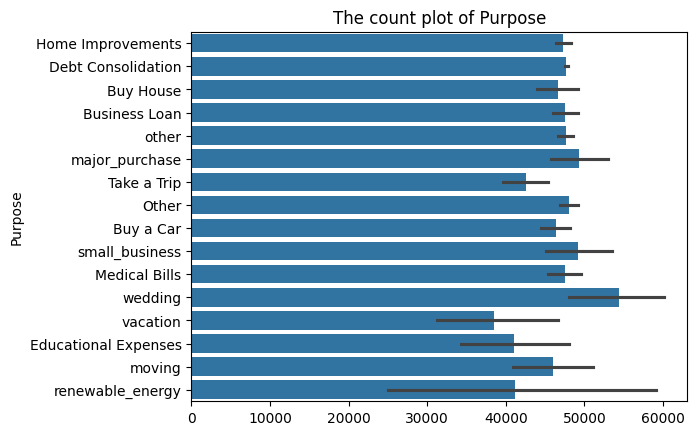

In [ ]:
sns.barplot(df['Purpose'])
plt.title("The count plot of Purpose")
plt.show()

In [ ]:
compare_categorical_with_target(df,'Purpose','Target')

# Okay the column has a significant values on the target column


Frequency distribution of Purpose:
Purpose
Debt Consolidation      53374
other                    3970
Home Improvements        3892
Other                    2176
Business Loan            1045
Buy a Car                 884
Medical Bills             716
Buy House                 450
Take a Trip               371
major_purchase            246
small_business            203
moving                    102
wedding                    77
Educational Expenses       70
vacation                   57
renewable_energy            6
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    51386
0    16253
Name: count, dtype: int64


Cross-tabulation between Purpose and Target:
Target                    0      1
Purpose                           
Business Loan           354    691
Buy House               107    343
Buy a Car               152    732
Debt Consolidation    12889  40485
Educational Expenses     10     60
Home Improvements       830   3062
Medical Bills           188    52

#### INSIGHT:
- This column has a significant impact on the target
- We can do label encoding for this(Yet to be done)

#### Transformation

In [ ]:
df['Purpose'] = lable_encoding.fit_transform(df['Purpose'])

NameError: name 'lable_encoding' is not defined

In [ ]:
df['Home Ownership'].unique() # Super changed into a numerical value.

array([1, 2, 3, 0])

### Monthly Debt

In [ ]:
df['Monthly Debt'].dtype

dtype('float64')

In [ ]:
df['Monthly Debt'].isna().sum()

0

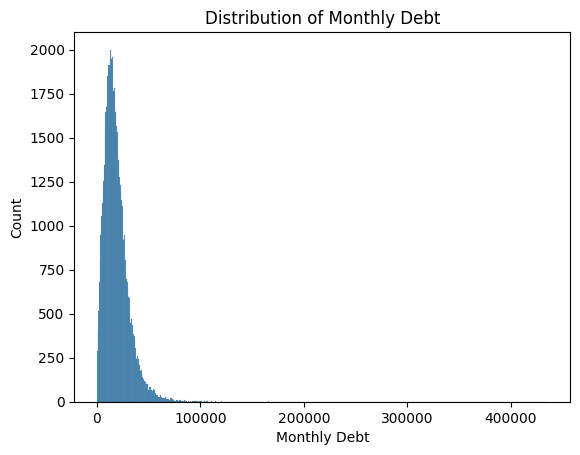

In [ ]:
# See the distribution of the Monthly Debt column

sns.histplot(df['Monthly Debt'])
plt.title("Distribution of Monthly Debt")
plt.show()

# By the graph we can see that the data we are dealing with has a high right skewness.

In [ ]:
df['Monthly Debt'].skew() # The skewness is very high

2.427846968892541

#### INSIGHT:
- This column has a high Skewness which can be reduced by sqrt transformation

#### Transformations

In [ ]:
np.sqrt(np.log1p(df['Monthly Debt'])).skew() # The log transformation didn't reduce the skewness

-7.171806377663095

In [ ]:
np.sqrt((df['Monthly Debt'])).skew()

0.42038574720842126

In [ ]:
df['Test'] = df['Monthly Debt']

In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = transformer.fit_transform(df[['Monthly Debt']])
skewness_after_imputation = df['YeoJohnson_Transformed'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")
# We can see that the yeo-johnson transformation has significantly reduced our skewness

Skewness after imputation: 0.03


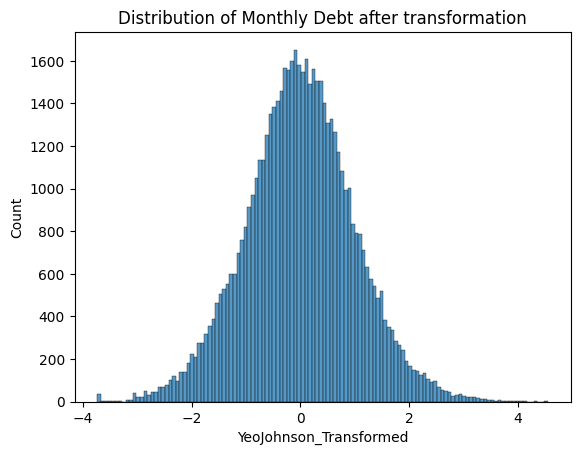

In [ ]:
sns.histplot(df['YeoJohnson_Transformed'])
plt.title("Distribution of Monthly Debt after transformation")
plt.show()

After Transformation : 1.486571769160648
Befor Transformation : 3.1712362386929387


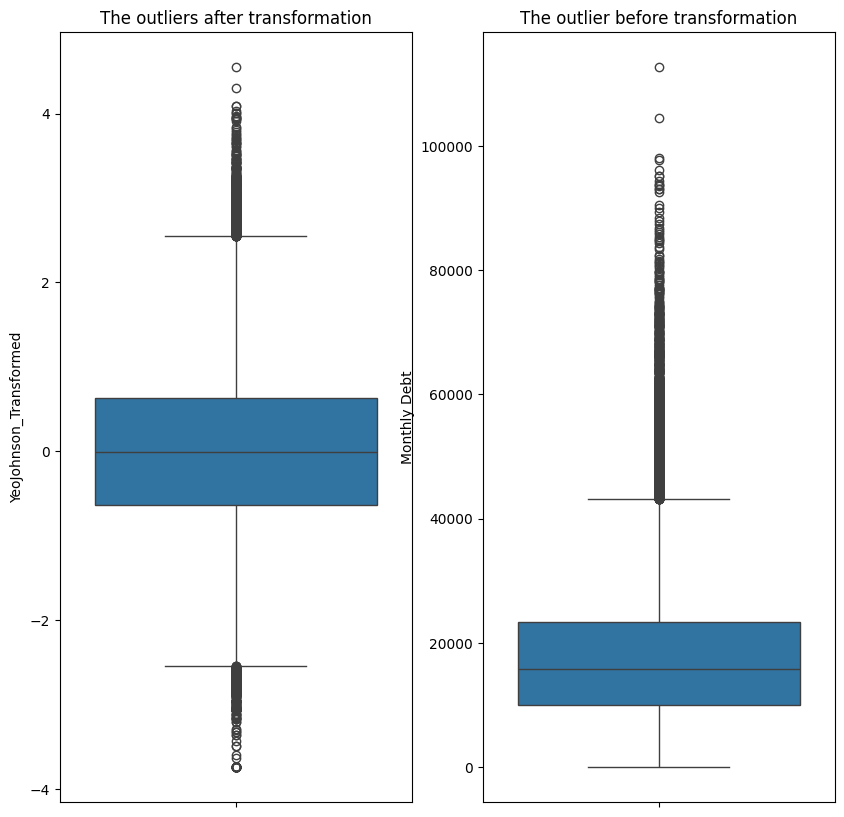

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.boxplot(df['YeoJohnson_Transformed'])
plt.title("The outliers after transformation")
print(f"After Transformation : {calculate_outlier_percentage('YeoJohnson_Transformed',df)}")

plt.subplot(1,2,2)
sns.boxplot(df['Monthly Debt'])
plt.title("The outlier before transformation")
print(f"Befor Transformation : {calculate_outlier_percentage('Monthly Debt',df)}")

In [ ]:
df['Monthly Debt'] = df['YeoJohnson_Transformed']
df.drop(['YeoJohnson_Transformed'],axis = 1,inplace = True)

In [ ]:
df['Monthly Debt'].skew()

0.029146271015725436

In [ ]:
df = remove_outliers('Monthly Debt',df) # Removing the outliers

### Bankruptcies

In [ ]:
df['Bankruptcies'].dtype

dtype('float64')

In [ ]:
df['Bankruptcies'].isna().sum()

148

In [ ]:
df['Bankruptcies'].nunique()

8

In [ ]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  2.,  3., nan,  4.,  5.,  7.,  6.])

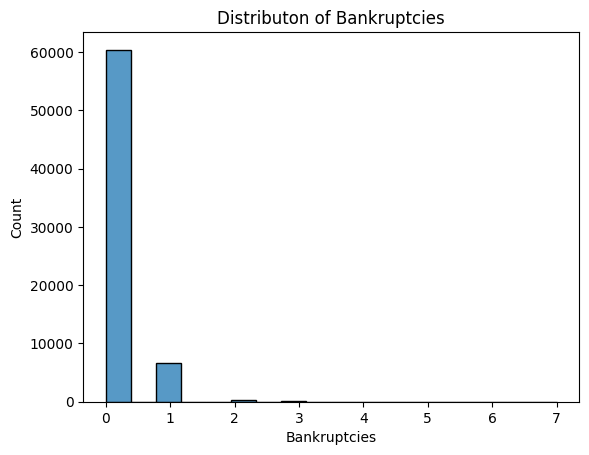

In [ ]:
sns.histplot(df['Bankruptcies'])
plt.title("Distributon of Bankruptcies")
plt.show()

In [ ]:
compare_categorical_with_target(df,'Bankruptcies')

Column 'Bankruptcies' is numeric but treated as categorical.

Frequency distribution of Bankruptcies:
Bankruptcies
0.0    60422
1.0     6721
2.0      261
nan      148
3.0       65
4.0       16
5.0        4
7.0        1
6.0        1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    51386
0    16253
Name: count, dtype: int64


Cross-tabulation between Bankruptcies and Target:
Target            0      1
Bankruptcies              
0.0           14585  45837
1.0            1555   5166
2.0              56    205
3.0              13     52
4.0               5     11
5.0               1      3
6.0               0      1
7.0               0      1
nan              38    110

Chi-squared test statistic: 6.166457801714475
P-value: 0.6285922110048334
The categorical variable 'Bankruptcies' does not have a statistically significant relationship with 'Target'.


In [ ]:
df['Bankruptcies'] = df['Bankruptcies'].astype('float64')

#### INSIGHT:
- This column has no significant relationship with the target so we can remove from chi_square test
- But accordingt to the expects this is a important column.So we can compare with the other columns

### Years of Credit History

In [ ]:
df['Years of Credit History'].dtype # Okay it is float value

dtype('float64')

In [ ]:
df['Years of Credit History'].isna().sum() # Good that it doesn't have null values.

0

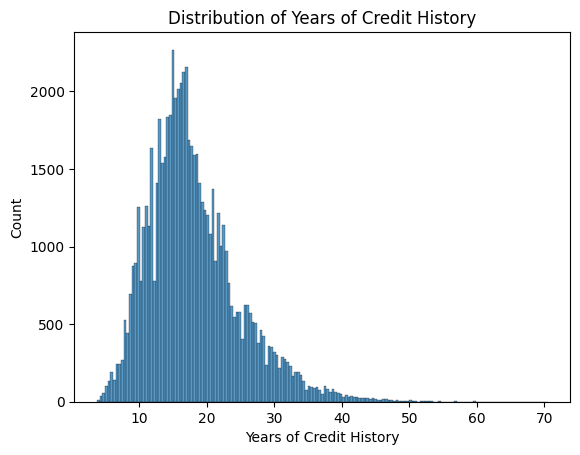

In [ ]:
# Check the distribution of the data

sns.histplot(df['Years of Credit History'])
plt.title("Distribution of Years of Credit History")
plt.show() # This does look like a skewed data but let's procede furture

In [ ]:
df['Years of Credit History'].skew() # Okay there is a skewness in the right tail

1.0265912394366021

#### INSIGHT:
- This column can be done with log transformation

In [ ]:
np.log1p(df['Years of Credit History']).skew() # The logiratumic transformation reduces the skewness

-0.09296508772181421

#### Transformation

In [ ]:
df['Test'] = np.log1p(df['Years of Credit History']).skew()

In [ ]:
print(f"The percentage of outliers before transformation : {calculate_outlier_percentage('Years of Credit History',df)}")
print(f"The percentage of outliers after transformation : {calculate_outlier_percentage('Test',df)}")

The percentage of outliers before transformation : 3.1069827033952597
The percentage of outliers after transformation : 0.0


In [ ]:
compare_numerical_with_target('Test')

Correlation: -1.9098525862123548e-16


In [ ]:
compare_numerical_with_target('Years of Credit History')

Correlation: 0.020448694718146823


In [ ]:
df['Years of Credit History'] = df['Test']
df.drop(['Test'],axis = 1,inplace = True)

In [ ]:
df[['Bankruptcies', 'Tax Liens', 'Target']].corr()

,Bankruptcies,Tax Liens,Target
Bankruptcies,1.000000,0.047493,0.008015
Tax Liens,0.047493,1.000000,-0.012295
Target,0.008015,-0.012295,1.000000


In [ ]:
df.drop(['Bankruptcies','Tax Liens'],axis = 1,inplace = True)

In [ ]:
df.columns

Index(['Target', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Credit Problems',
       'Current Credit Balance', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Number of Open Accounts

In [ ]:
df['Number of Open Accounts'].dtype

dtype('int64')

In [ ]:
df['Number of Open Accounts'].isna().sum()

0

In [ ]:
df['Number of Open Accounts'].nunique()

50

In [ ]:
df['Number of Open Accounts'].unique()

array([ 6, 18,  9, 13,  4, 20, 16, 10, 15,  7, 12, 17,  8, 14, 11, 34,  5,
       19,  2, 32, 22, 21,  3, 24, 43, 25, 23,  1, 30, 27, 26, 28, 36, 31,
       29, 45, 33, 38, 40, 41, 48, 39, 37, 47, 56, 35, 44, 42, 52, 76])

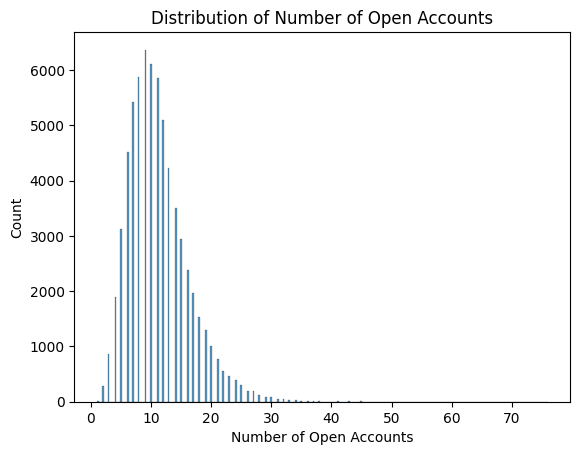

In [ ]:
# Let's visualize the distribution.

sns.histplot(df['Number of Open Accounts'])
plt.title("Distribution of Number of Open Accounts")
plt.show()

In [ ]:
df['Number of Open Accounts'].skew()

1.1968245125179753

In [ ]:
compare_numerical_with_target('Number of Open Accounts')

Correlation: -0.016479489497446258


In [ ]:
compare_categorical_with_target(df,'Number of Credit Problems','Target')

Column 'Number of Credit Problems' is numeric but treated as categorical.

Frequency distribution of Number of Credit Problems:
Number of Credit Problems
0     58646
1      7791
2       831
3       229
4        80
5        34
6        12
7         7
8         3
9         2
11        1
15        1
10        1
12        1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    51386
0    16253
Name: count, dtype: int64


Cross-tabulation between Number of Credit Problems and Target:
Target                         0      1
Number of Credit Problems              
0                          14098  44548
1                           1839   5952
10                             0      1
11                             0      1
12                             1      0
15                             0      1
2                            217    614
3                             56    173
4                             23     57
5                             14     20
6                

In [ ]:
# Since we can't have 0 Open Accounts
# So will drop those records

dfa = df[df['Number of Open Accounts']==0]
df.drop(dfa.index,inplace=True)
df.shape

(63334, 16)

### Current Credit Balance

In [ ]:
df['Current Credit Balance'].dtype

dtype('int64')

In [ ]:
df['Current Credit Balance'].nunique()

29618

In [ ]:
df['Current Credit Balance'].isna().sum()

0

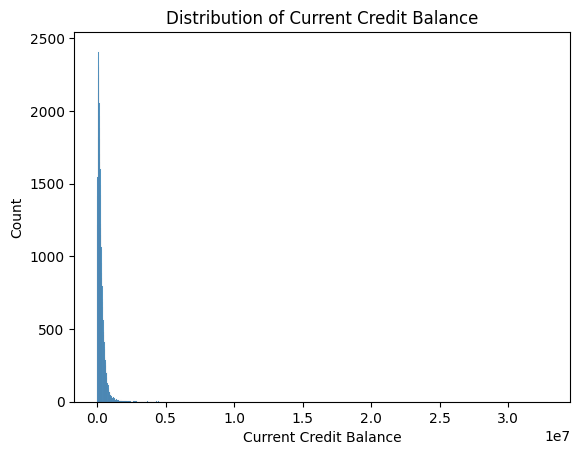

In [ ]:
# So we need to check the distribution

sns.histplot(df['Current Credit Balance'])
plt.title("Distribution of Current Credit Balance")
plt.show()

In [ ]:
df['Current Credit Balance'].skew() # The skewness is very high

16.376797537509407

#### INSIGHT:
- Double sqrt transformation is working good in this column for transformation

#### Transforamtions

In [ ]:
np.sqrt(np.sqrt(df['Current Credit Balance'])).skew()

-0.022864545251743397

In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = transformer.fit_transform(df[['Current Credit Balance']])
skewness_after_imputation = df['YeoJohnson_Transformed'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")

Skewness after imputation: 0.17


Percentage of outliers(Before) = 4.996796925048046
Percentage of outliers(After) = 2.2830806463093456


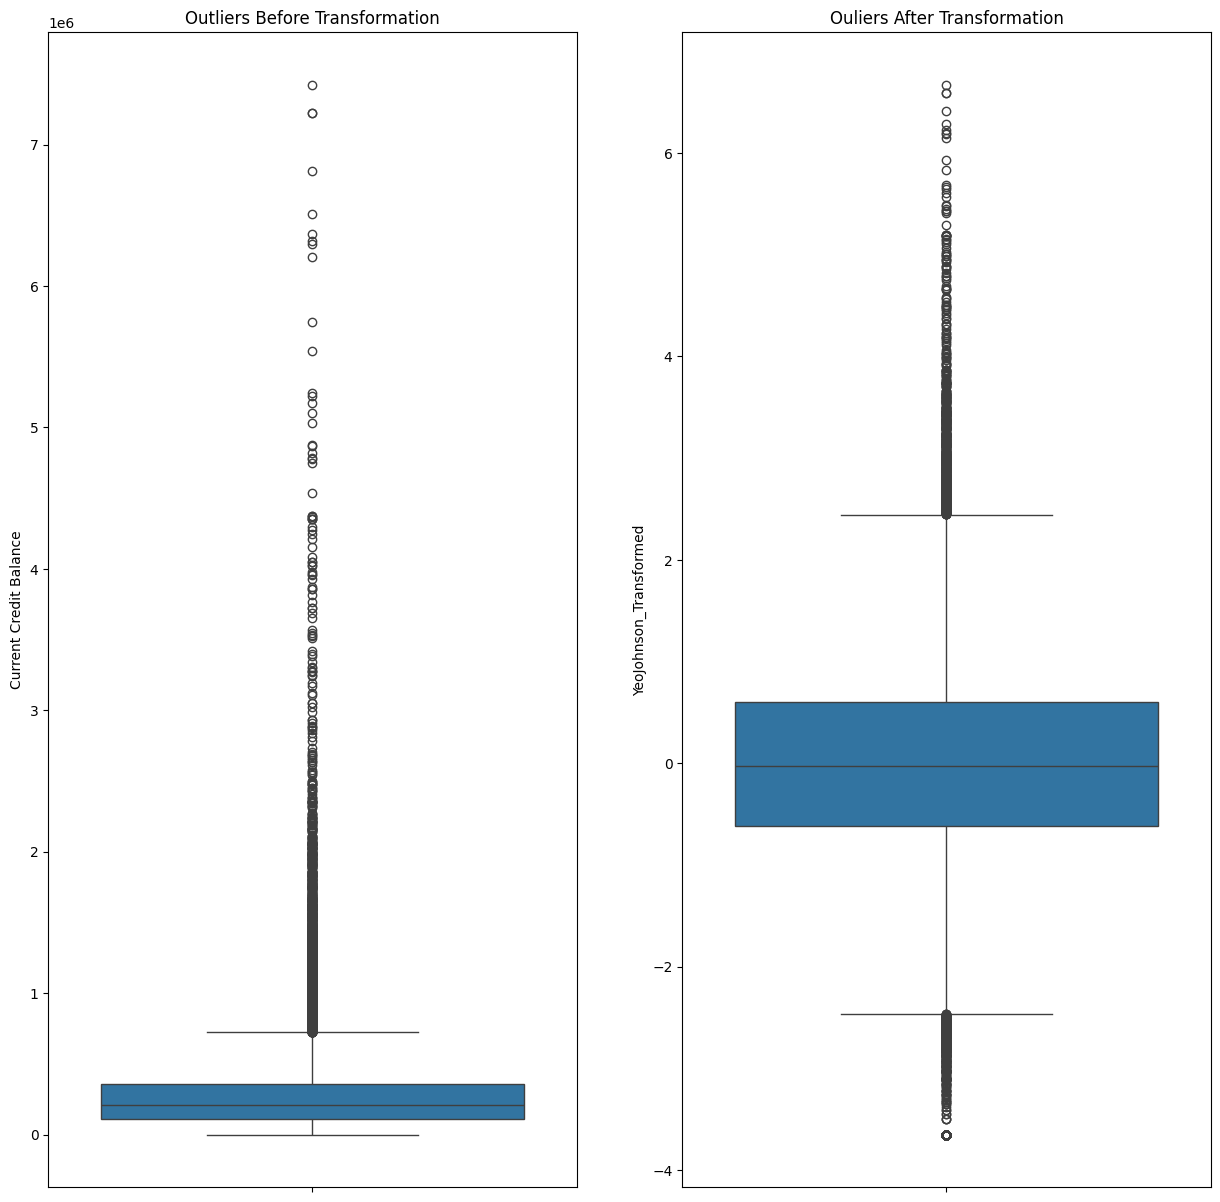

In [ ]:
# Let's check for the outliers.

plt.figure(figsize = (15,15))

plt.subplot(1,2,1)
sns.boxplot(df['Current Credit Balance'])
plt.title("Outliers Before Transformation")
print(f"Percentage of outliers(Before) = {calculate_outlier_percentage('Current Credit Balance',df)}")

plt.subplot(1,2,2)
sns.boxplot(df['YeoJohnson_Transformed'])
plt.title("Ouliers After Transformation")
print(f"Percentage of outliers(After) = {calculate_outlier_percentage('YeoJohnson_Transformed',df)}")
plt.show()

# MAny data are considered as a outlier here.Let's check for percentage of outlier

In [ ]:
#compare_numerical_with_target('YeoJohnson_Transformed'),
compare_numerical_with_target('Current Credit Balance')

Correlation: -0.001501400090480007


In [ ]:
df['Current Credit Balance'] = df['YeoJohnson_Transformed']

In [ ]:
df.drop(['YeoJohnson_Transformed'],axis = 1,inplace = True)

### Maximum Open Credit

In [ ]:
df['Maximum Open Credit'].dtype

dtype('float64')

In [ ]:
df['Maximum Open Credit'].isna().sum()

1

In [ ]:
df['Maximum Open Credit'].dropna(inplace = True)

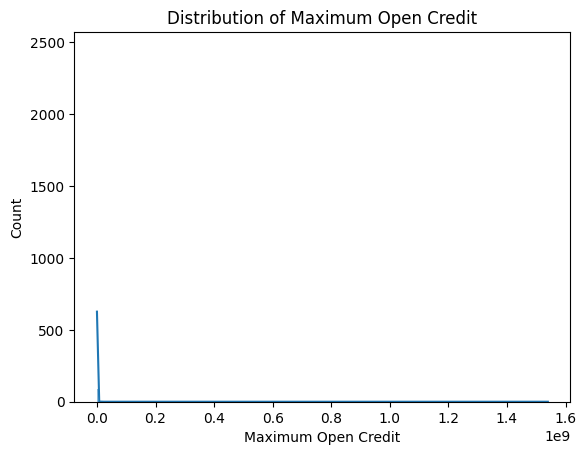

In [ ]:
sns.histplot(df['Maximum Open Credit'],kde = True)
plt.title("Distribution of Maximum Open Credit")
plt.show() # Something is wrong with the column so we should investicate it

In [ ]:
df['Maximum Open Credit'].skew()

156.07650325280787

In [ ]:
l = (list(df['Maximum Open Credit'].unique()))
l.sort(reverse = True)

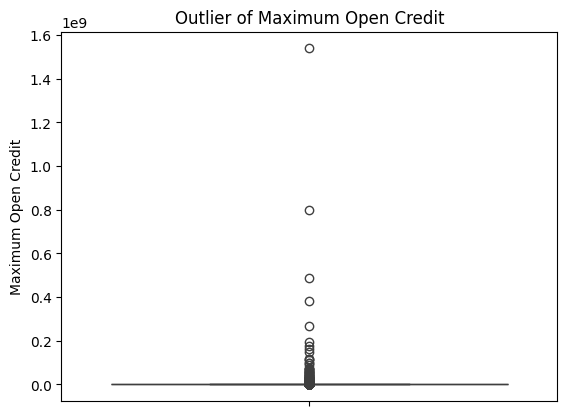

In [ ]:
sns.boxplot(df['Maximum Open Credit'])
plt.title("Outlier of Maximum Open Credit")
plt.show()

In [ ]:
calculate_outlier_percentage('Maximum Open Credit',df)

5.755555227014001

In [ ]:
compare_numerical_with_target('Maximum Open Credit')

Correlation: 0.008847857006114462


#### INSIGHTS:
- This column has a large number of outlers

In [ ]:
df.drop(['Maximum Open Credit'],axis = 1,inplace = True)

### Number of Credit Problems

df['Number of Credit Problems'].value_counts().plot(kind='bar')

In [ ]:
compare_categorical_with_target(df,'Number of Credit Problems','Target')
#As the correlation is very less we can leave this.


Frequency distribution of Number of Credit Problems:
Number of Credit Problems
0     58646
1      7791
2       831
3       229
4        80
5        34
6        12
7         7
8         3
9         2
11        1
15        1
10        1
12        1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    51386
0    16253
Name: count, dtype: int64


Cross-tabulation between Number of Credit Problems and Target:
Target                         0      1
Number of Credit Problems              
0                          14098  44548
1                           1839   5952
10                             0      1
11                             0      1
12                             1      0
15                             0      1
2                            217    614
3                             56    173
4                             23     57
5                             14     20
6                              2     10
7                              2      5
8          

In [ ]:
df['Number of Credit Problems'] = df['Number of Credit Problems'].astype('float64')

In [ ]:
df['Number of Credit Problems'].dtype

dtype('float64')

In [ ]:
df['Number of Credit Problems'].isna().sum()

0

In [ ]:
df['Number of Credit Problems'].nunique()

14

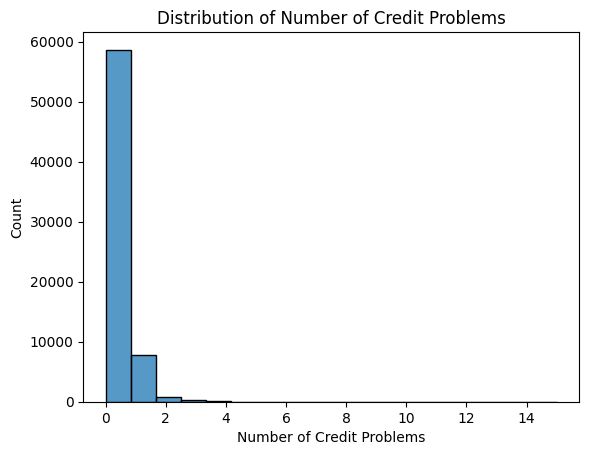

In [ ]:
# Let's visualize the distribution.

sns.histplot(df['Number of Credit Problems'])
plt.title("Distribution of Number of Credit Problems")
plt.show()

## Bivarient Visualization

In [ ]:
df.shape

(67639, 15)

In [ ]:
num_col = df.select_dtypes(exclude = 'object')
num_col.corr() # Correlation b/w the columns of numerical values

,Target,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Target,1.000000,-0.077636,0.136920,-0.460493,0.051936,0.003889,-0.015959,0.034690,-0.003276,0.008276,0.008848,0.008015,-0.012295
Current Loan Amount,-0.077636,1.000000,-0.394084,0.032194,0.310470,0.107108,0.392575,0.154036,-0.058792,0.295571,0.035758,-0.084524,0.022349
Term,0.136920,-0.394084,1.000000,-0.050068,-0.071230,-0.067592,-0.150201,-0.044055,0.020241,-0.098070,-0.009716,0.024147,0.001719
Credit Score,-0.460493,0.032194,-0.050068,1.000000,-0.015506,-0.004234,0.001504,-0.014596,-0.000136,0.000557,-0.003514,-0.005417,0.007408
Annual Income,0.051936,0.310470,-0.071230,-0.015506,1.000000,0.076668,0.466171,0.173313,-0.010227,0.299248,0.046277,-0.041194,0.042393
Years in current job,0.003889,0.107108,-0.067592,-0.004234,0.076668,1.000000,0.132110,0.222742,0.039605,0.098418,0.004325,0.038206,0.014850
Monthly Debt,-0.015959,0.392575,-0.150201,0.001504,0.466171,0.132110,1.000000,0.216504,-0.046142,0.478650,0.047336,-0.071456,0.023994
Years of Credit History,0.034690,0.154036,-0.044055,-0.014596,0.173313,0.222742,0.216504,1.000000,0.056294,0.213966,0.032808,0.057657,0.019674
Number of Credit Problems,-0.003276,-0.058792,0.020241,-0.000136,-0.010227,0.039605,-0.046142,0.056294,1.000000,-0.106316,-0.012246,0.748555,0.590863
Current Credit Balance,0.008276,0.295571,-0.098070,0.000557,0.299248,0.098418,0.478650,0.213966,-0.106316,1.000000,0.149549,-0.118053,-0.013476


### Numerical column Correlation

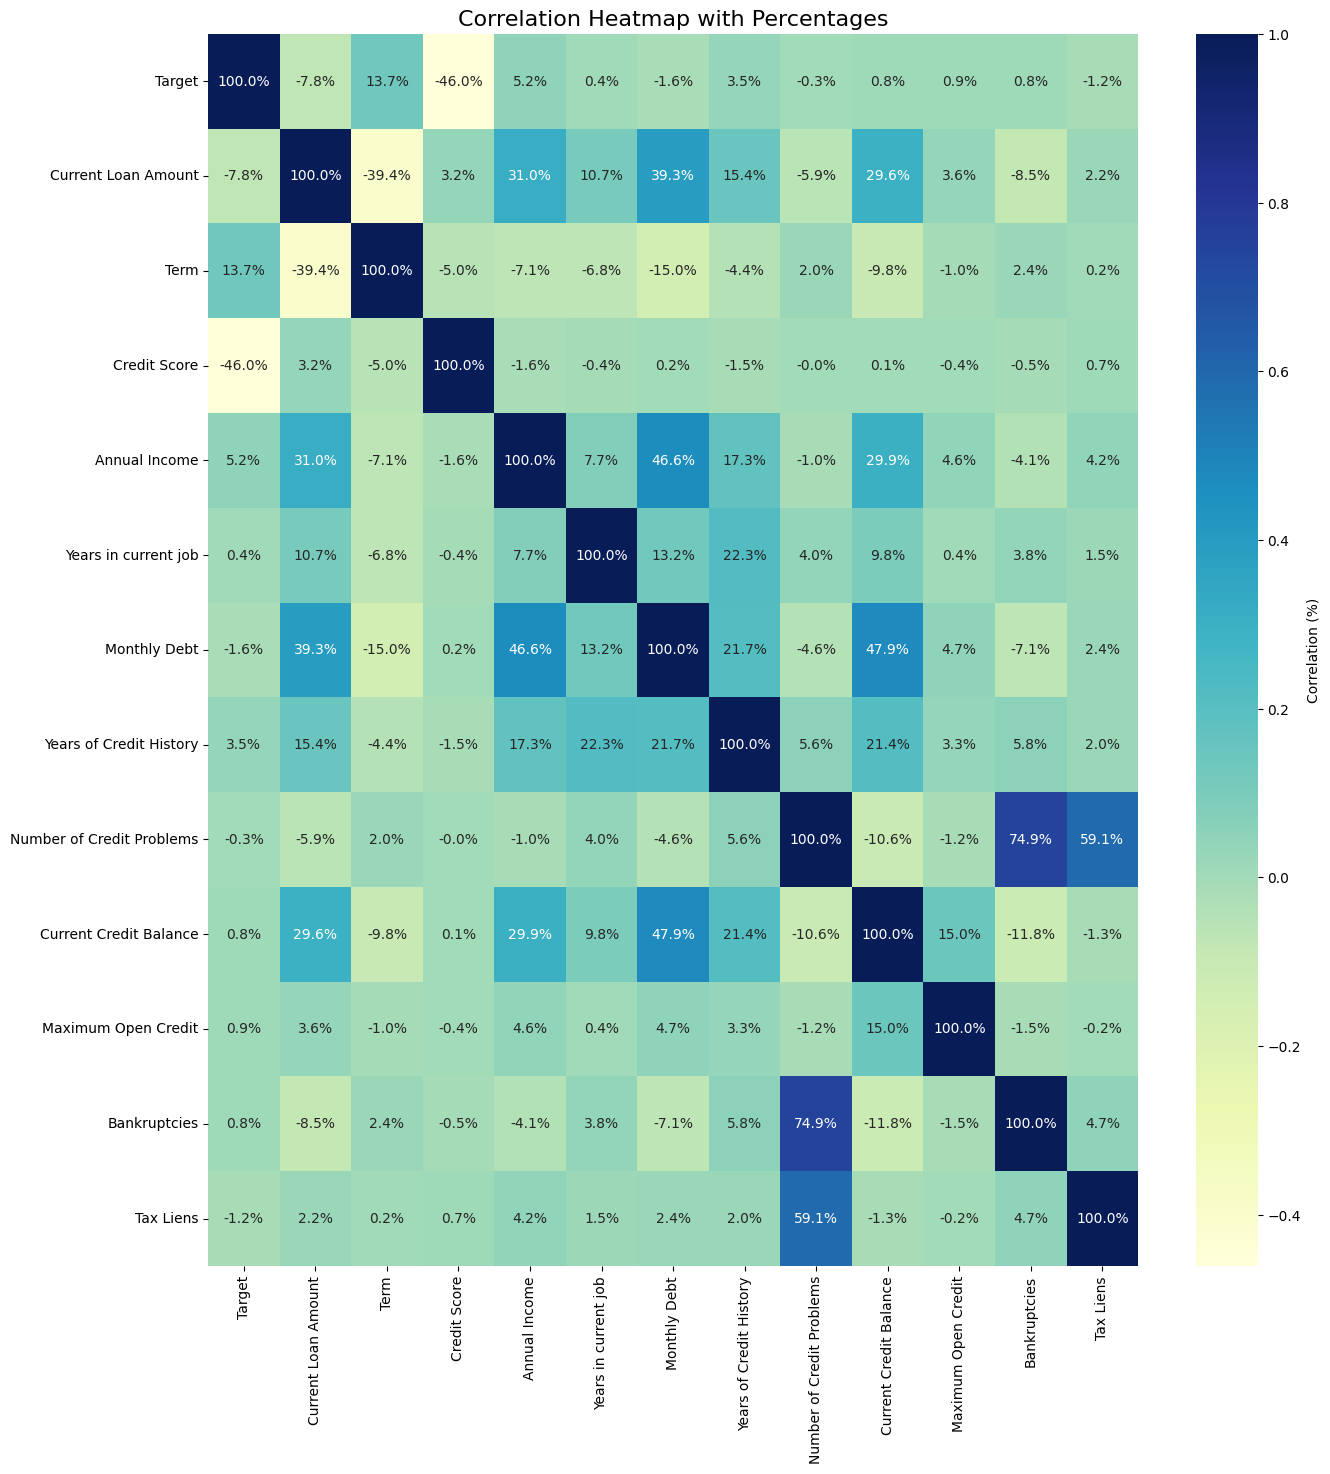

In [ ]:
plt.figure(figsize = (15,16))
sns.heatmap(num_col.corr(),
    cmap="YlGnBu",
    annot=True,
    fmt=".1%",
    annot_kws={"size": 10},
    cbar_kws={"label": "Correlation (%)"},
)

plt.title("Correlation Heatmap with Percentages", fontsize=16)
plt.show()

### Visualizations

#### Bankrupticies vs No.of Credit Problems

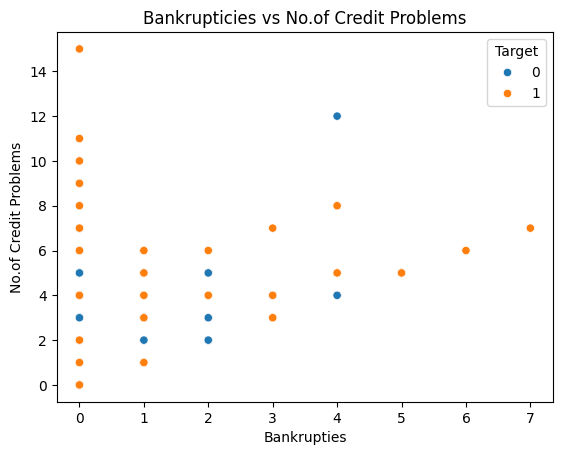

In [ ]:
sns.scatterplot(data = df,x = 'Bankruptcies',y = 'Number of Credit Problems',hue = 'Target')
plt.title("Bankrupticies vs No.of Credit Problems")
plt.xlabel("Bankrupties")
plt.ylabel("No.of Credit Problems")
plt.show()

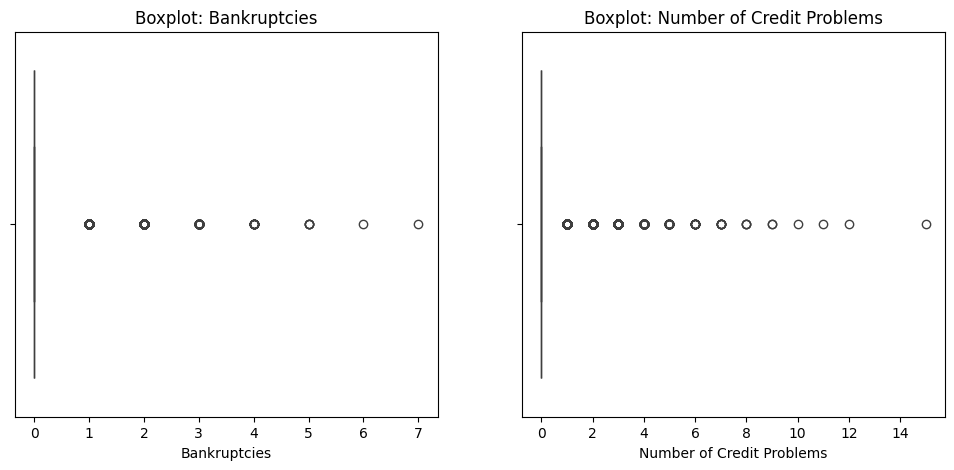

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Bankruptcies'])
plt.title("Boxplot: Bankruptcies")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Number of Credit Problems'])
plt.title("Boxplot: Number of Credit Problems")

plt.show()

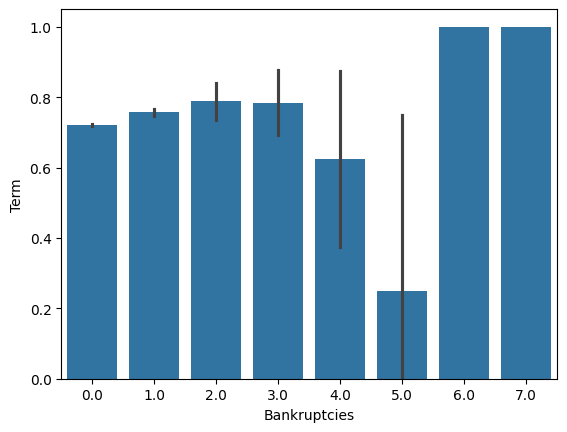

In [ ]:
# Bankruptcies Vs Term
# For Short term loans customer cannot repay debts to creditors, hence have more chances of bankruptcy

sns.barplot(x=df['Bankruptcies'],y=df['Term'])
plt.show()

#### Home Ownership Vs Loan Status

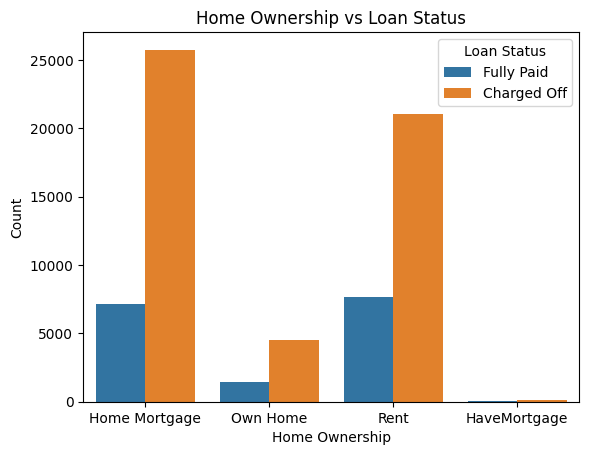

In [ ]:
# Home Ownership Vs Loan Status
# Most of customers living at rent charged off

sns.countplot(x='Home Ownership', data=df, hue='Target')
plt.title("Home Ownership vs Loan Status")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Fully Paid", "Charged Off"])
plt.show()

#### Current Loan Amount Vs Years in Current Job

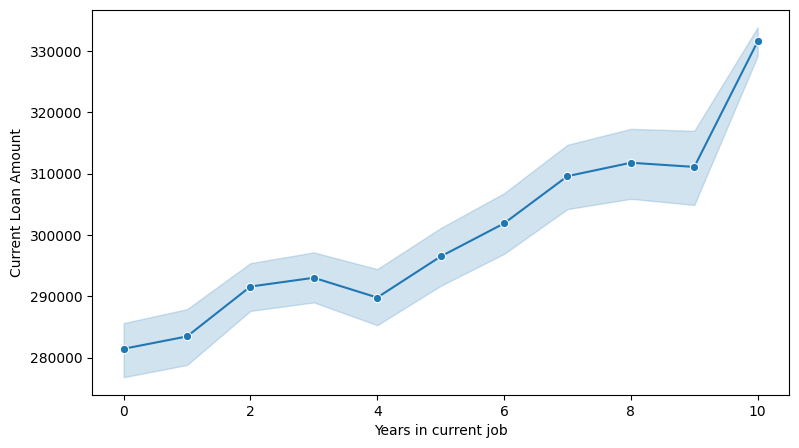

In [ ]:
# Current Loan Amount Vs Years in Current Job
# 2 years expericed customers have higest current loan amount due

plt.figure(figsize=(9,5))
sns.lineplot(x=df['Years in current job'],y=df['Current Loan Amount'],marker='o')
plt.show()

#### Current Loan Amount Vs Purpose

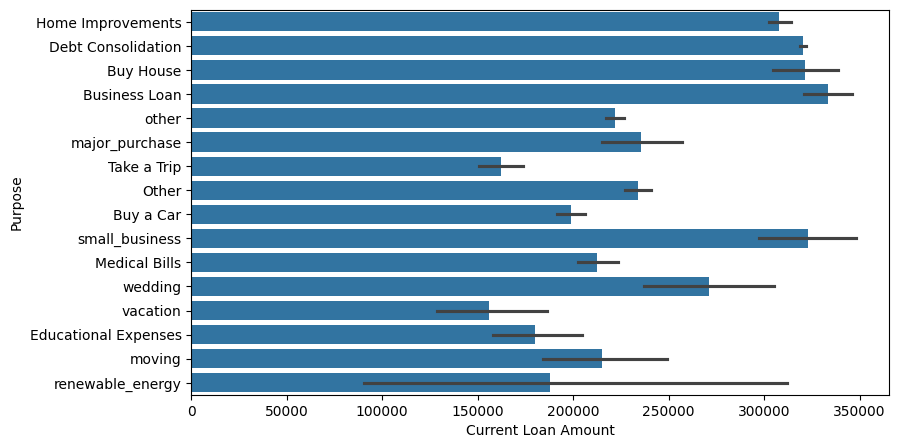

In [ ]:
# Current Loan Amount Vs Purpose
# Results showed High Loan amount were granted for purpose like wedding, educational expenses, moving, buying a car etc

plt.figure(figsize=(9,5))
sns.barplot(x=df['Current Loan Amount'],y=df['Purpose'],orient='h')
plt.show()

## TRANSFORMATIONS

In [ ]:
df.dropna(inplace = True)
df.isna().sum()

,0
Target,0
Current Loan Amount,0
Term,0
Credit Score,0
Annual Income,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


In [ ]:
# Define transformers for remaining numeric columns
scaler_transformer = StandardScaler()
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
sqrt_transformer = FunctionTransformer(func=np.sqrt, inverse_func=np.square)
label_encoder_home = LabelEncoder()
label_encoder_purpose = LabelEncoder()

# Encode categorical variables
df['Home Ownership'] = label_encoder_home.fit_transform(df['Home Ownership'].fillna('Unknown'))
df['Purpose'] = label_encoder_purpose.fit_transform(df['Purpose'].fillna('Unknown'))

# Updated transformers to include scaling
transformers = [
    ('current_loan', yeo_johnson_transformer, ['Current Loan Amount']),
    ('credit_score', yeo_johnson_transformer, ['Credit Score']),
    ('annual_income', log_transformer, ['Annual Income']),
    ('monthly_debt', sqrt_transformer, ['Monthly Debt']),
    ('years_credit_history', log_transformer, ['Years of Credit History']),
    ('current_credit_balance', log_transformer, ['Current Credit Balance']),
    ('scaling_remaining', scaler_transformer, [
        'Number of Credit Problems', 'Maximum Open Credit', 'Bankruptcies',
        'Tax Liens', 'Number of Open Accounts'
    ])
]

# Updated pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers, remainder='passthrough')),
])

# Fit the updated pipeline
pipeline.fit(df.drop('Target', axis=1))

# Transform the dataset
transformed_data = pipeline.transform(df.drop('Target', axis=1))

# Output the transformed dataset as a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=df.drop('Target', axis=1).columns)

In [ ]:
transformed_df.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Number of Open Accounts
0,0.902058,-0.686243,13.970370,72.213157,2.901422,12.337938,1.772122,-0.044908,2.583975,-0.10841,-1.032995,1.0,8.0,1.0,5.0
1,-0.063201,0.913997,14.618361,170.881626,2.766319,12.604839,1.772122,-0.001572,-0.326117,-0.10841,1.358672,1.0,8.0,2.0,3.0
2,0.414245,-0.204502,13.601017,93.498128,2.564949,12.454221,-0.338646,-0.048780,-0.326117,-0.10841,-0.435078,0.0,3.0,2.0,3.0
3,-0.393688,0.243324,13.984574,104.187715,3.025291,11.713177,1.772122,-0.063718,2.583975,-0.10841,0.362144,1.0,0.0,1.0,3.0
4,1.349187,-1.489890,14.755170,136.602635,3.161247,12.988082,-0.338646,-0.026930,-0.326117,-0.10841,-1.431606,1.0,2.0,3.0,3.0


In [ ]:
transformed_df.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Number of Open Accounts', 'Target'],
      dtype='object')

## Dataset for Training Model

In [ ]:
# Reset index of the original and transformed DataFrame
df.reset_index(drop=True, inplace=True)
transformed_df.reset_index(drop=True, inplace=True)

# Assign the target column
transformed_df['Target'] = df['Target']

In [ ]:
transformed_df.Target.value_counts()

,count
Target,
1,51276
0,11920


In [ ]:
df.Target.isna().sum()

0

In [ ]:
transformed_df.Target.isna().sum()

0

In [ ]:
transformed_df.shape

(63196, 16)

In [ ]:
# Independent variable
X = transformed_df.drop(['Target'], axis = 1)

# Dependent variable
y = transformed_df['Target']

In [ ]:
sm = SMOTE(sampling_strategy='minority')
# Resample the data
X_sm, y_sm = sm.fit_resample(X, y) # Upsampling the data as the data has a class imbalance

 This stratify parameter makes a split so that the proportion of values in the sample produced
 will be the same as the proportion of values provided to parameter stratify.
 For example, if variable y is a binary categorical variable with values 0 and 1
 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [ ]:
# Train-Test Split

X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,stratify=y_sm,test_size=.3,random_state=0)

In [ ]:
# Checking data split

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71786, 15)
(71786,)
(30766, 15)
(30766,)


## Models

### Logistic Regression.

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

# Predictions

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

In [ ]:
lg.score(X_test,y_test)

0.5901644672690632

In [ ]:
# Validating on train
print('Recall Score for training data is',recall_score(y_train,y_train_pred))
print('Precision Score for training data is',precision_score(y_train,y_train_pred))
print('F1 Score for training data is',f1_score(y_train,y_train_pred))
print('Accuracy Score for training data is',accuracy_score(y_train,y_train_pred))
print('\n')

# Validating on test
print('Recall Score for testing data is',recall_score(y_test,y_test_pred))
print('Precision Score for testing data is',precision_score(y_test,y_test_pred))
print('F1 Score for testing data is',f1_score(y_test,y_test_pred))
print('Accuracy Score for testing data is',accuracy_score(y_test,y_test_pred))

Recall Score for training data is 0.6152453124564679
Precision Score for training data is 0.5922915996137753
F1 Score for training data is 0.6035502958579881
Accuracy Score for training data is 0.5958682751511437


Recall Score for testing data is 0.6102190730026653
Precision Score for testing data is 0.5866875
F1 Score for testing data is 0.5982219673071408
Accuracy Score for testing data is 0.5901644672690632


In [ ]:
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix for training data is:
[[20692 15201]
 [13810 22083]]


Confusion Matrix for testing data is:
[[8770 6613]
 [5996 9387]]


### Decision Tree Classifier

In [ ]:
dc = DecisionTreeClassifier(max_depth=30,min_samples_split=7)
dc.fit(X_train,y_train)

# Predictions

y_train_pred = dc.predict(X_train)
y_test_pred = dc.predict(X_test)

In [ ]:
# Validating on train
print('Recall Score for training data is',recall_score(y_train,y_train_pred))
print('Precision Score for training data is',precision_score(y_train,y_train_pred))
print('F1 Score for training data is',f1_score(y_train,y_train_pred))
print('Accuracy Score for training data is',accuracy_score(y_train,y_train_pred))
print('\n')

# Validating on test
print('Recall Score for testing data is',recall_score(y_test,y_test_pred))
print('Precision Score for testing data is',precision_score(y_test,y_test_pred))
print('F1 Score for testing data is',f1_score(y_test,y_test_pred))
print('Accuracy Score for testing data is',accuracy_score(y_test,y_test_pred))

Recall Score for training data is 0.9335525032736188
Precision Score for training data is 0.9656205873029595
F1 Score for training data is 0.9493158058758535
Accuracy Score for training data is 0.9501574123088067


Recall Score for testing data is 0.7509588506793213
Precision Score for testing data is 0.791178686391343
F1 Score for testing data is 0.7705442902881536
Accuracy Score for testing data is 0.7763765195345511


In [ ]:
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix for training data is:
[[34700  1193]
 [ 2385 33508]]


Confusion Matrix for testing data is:
[[12334  3049]
 [ 3831 11552]]


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth=30,min_samples_split=5)
rf.fit(X_train,y_train)

# Predictions

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


In [ ]:
print('Recall Score for training data is',recall_score(y_train,y_train_pred))
print('Precision Score for training data is',precision_score(y_train,y_train_pred))
print('F1 Score for training data is',f1_score(y_train,y_train_pred))
print('Accuracy Score for training data is',accuracy_score(y_train,y_train_pred))
print('\n')

# Validating on test
print('Recall Score for testing data is',recall_score(y_test,y_test_pred))
print('Precision Score for testing data is',precision_score(y_test,y_test_pred))
print('F1 Score for testing data is',f1_score(y_test,y_test_pred))
print('Accuracy Score for testing data is',accuracy_score(y_test,y_test_pred))

Recall Score for training data is 0.9918647089961831
Precision Score for training data is 0.9991019560519743
F1 Score for training data is 0.9954701786762855
Accuracy Score for training data is 0.9954865851280194


Recall Score for testing data is 0.8558798673860756
Precision Score for testing data is 0.8364675984752223
F1 Score for testing data is 0.8460623975837804
Accuracy Score for testing data is 0.8442761489956445


In [ ]:
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix for training data is:
[[35861    32]
 [  292 35601]]


Confusion Matrix for testing data is:
[[12809  2574]
 [ 2217 13166]]


### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

# Predictions

y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

In [ ]:
# Validating on train
print('Recall Score for training data is',recall_score(y_train,y_train_pred))
print('Precision Score for training data is',precision_score(y_train,y_train_pred))
print('F1 Score for training data is',f1_score(y_train,y_train_pred))
print('Accuracy Score for training data is',accuracy_score(y_train,y_train_pred))
print('\n')

# Validating on test
print('Recall Score for testing data is',recall_score(y_test,y_test_pred))
print('Precision Score for testing data is',precision_score(y_test,y_test_pred))
print('F1 Score for testing data is',f1_score(y_test,y_test_pred))
print('Accuracy Score for testing data is',accuracy_score(y_test,y_test_pred))

Recall Score for training data is 0.8975009054690329
Precision Score for training data is 0.8007258084561656
F1 Score for training data is 0.8463559455625033
Accuracy Score for training data is 0.8370712952386259


Recall Score for testing data is 0.8993044269648313
Precision Score for testing data is 0.7968894009216589
F1 Score for testing data is 0.8450050392450295
Accuracy Score for testing data is 0.8350451797438732


In [ ]:
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train,y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix for training data is:
[[27876  8017]
 [ 3679 32214]]


Confusion Matrix for testing data is:
[[11857  3526]
 [ 1549 13834]]


## DOWNLOAD MODEL

In [ ]:
with open('Gradient Boosting Classifier.pkl', 'wb') as file:
    pickle.dump(gbc, file)